## Importing important libraries

In [1]:
#importing some important libraries

import pandas as pd
#setting max_columns and max_rows as None to show all the values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

## Importing Dataset

In [2]:
#getting the loan data 
loan_data = pd.read_csv('loan.csv')

C:\Users\gupta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#checking data information
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [4]:
#checking the shape
loan_data.shape

(39717, 111)

## Missing Value Analysis

In [5]:
#checking for null values in data
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
#creating a function to give null value percentage and count in dataframe
#creating empty list to store null values count and percentages
def null_calc(data):
    feature_name = []
    feature_type = []
    null_count = []
    null_percentage = []
    for i in data.columns:
        feature_name.append(i)
        feature_type.append(data[i].dtype)
        null_count.append(data[i].isnull().sum())
        null_percentage.append(round((data[i].isnull().sum())*100/int(data.shape[0]),2))


    #creating dataframe
    feature_null = pd.DataFrame(
        {'feature_name': feature_name,
         'feature_type': feature_type,
         'null_count': null_count,
         'null_percentage': null_percentage
        })

    #displaying dataframe sorting them in the descending manner for null_percentage
    return(feature_null.sort_values(by = 'null_percentage', ascending=False))


In [141]:
feature_null_df = null_calc(loan_data)

In [142]:
feature_null_df

feature_name feature_type  null_count  null_percentage
55        verification_status_joint      float64       39717           100.00
53                 annual_inc_joint      float64       39717           100.00
81             mo_sin_old_rev_tl_op      float64       39717           100.00
80               mo_sin_old_il_acct      float64       39717           100.00
77                          bc_util      float64       39717           100.00
76                   bc_open_to_buy      float64       39717           100.00
75                      avg_cur_bal      float64       39717           100.00
74             acc_open_past_24mths      float64       39717           100.00
73                     inq_last_12m      float64       39717           100.00
72                      total_cu_tl      float64       39717           100.00
71                           inq_fi      float64       39717           100.00
70                 total_rev_hi_lim      float64       39717           100.00
69                         all_util      float64       39717           100.00
68                       max_bal_bc      float64       39717           100.00
67                      open_rv_24m      float64       39717           100.00
66                      open_rv_12m      float64       39717           100.00
65                          il_util      float64       39717           100.00
64                     total_bal_il      float64       39717           100.00
63               mths_since_rcnt_il      float64       39717           100.00
62                      open_il_24m      float64       39717           100.00
61                      open_il_12m      float64       39717           100.00
60                       open_il_6m      float64       39717           100.00
59                      open_acc_6m      float64       39717           100.00
58                      tot_cur_bal      float64       39717           100.00
57                     tot_coll_amt      float64       39717           100.00
82            mo_sin_rcnt_rev_tl_op      float64       39717           100.00
83                   mo_sin_rcnt_tl      float64       39717           100.00
84                         mort_acc      float64       39717           100.00
97              num_rev_tl_bal_gt_0      float64       39717           100.00
109                  total_bc_limit      float64       39717           100.00
108               total_bal_ex_mort      float64       39717           100.00
107                 tot_hi_cred_lim      float64       39717           100.00
104                percent_bc_gt_75      float64       39717           100.00
103                  pct_tl_nvr_dlq      float64       39717           100.00
102              num_tl_op_past_12m      float64       39717           100.00
101              num_tl_90g_dpd_24m      float64       39717           100.00
100                    num_tl_30dpd      float64       39717           100.00
99                 num_tl_120dpd_2m      float64       39717           100.00
98                         num_sats      float64       39717           100.00
96                    num_rev_accts      float64       39717           100.00
85             mths_since_recent_bc      float64       39717           100.00
95                    num_op_rev_tl      float64       39717           100.00
94                        num_il_tl      float64       39717           100.00
93                        num_bc_tl      float64       39717           100.00
92                      num_bc_sats      float64       39717           100.00
91                  num_actv_rev_tl      float64       39717           100.00
90                   num_actv_bc_tl      float64       39717           100.00
89            num_accts_ever_120_pd      float64       39717           100.00
88   mths_since_recent_revol_delinq      float64       39717           100.00
87            mths_since_recent_inq      float64       39717           100.00
86         mths_since_recent_bc_dlq      floa

First we will drop all the columns which have 100% null values. And then we'll analyse rest of the columns to see how to deal with them.

In [8]:
#creating a list of loan_data_columns
loan_data_columns = list(loan_data.columns)

In [9]:
#removing columns names of all with all null values 
for i in feature_null_df[feature_null_df['null_percentage'] == 100.0]['feature_name']:
    loan_data_columns.remove(i)

In [10]:
#creating dataframe with all columns which does not have all null rows
loan_data_eda = loan_data[loan_data_columns]

In [11]:
# we will drop the id & member_id column
loan_data_eda.drop('id', axis = 1, inplace = True)
loan_data_eda.drop('member_id', axis = 1, inplace = True)

In [12]:
#checking the shape
loan_data_eda.shape

(39717, 55)

As we can see that we are left with 57, so now we will focus on those rows that still have null values.

In [13]:
#calling our function again to see null values
null_calc(loan_data_eda)

feature_name feature_type  null_count  null_percentage
45                next_pymnt_d       object       38577            97.13
27      mths_since_last_record      float64       36931            92.99
26      mths_since_last_delinq      float64       25682            64.66
17                        desc       object       12940            32.58
8                    emp_title       object        2459             6.19
9                   emp_length       object        1075             2.71
53        pub_rec_bankruptcies      float64         697             1.75
43                last_pymnt_d       object          71             0.18
51    chargeoff_within_12_mths      float64          56             0.14
47  collections_12_mths_ex_med      float64          56             0.14
31                  revol_util       object          50             0.13
54                   tax_liens      float64          39             0.10
19                       title       object          11             0.03
46          last_credit_pull_d       object           2             0.01
12         verification_status       object           0             0.00
44             last_pymnt_amnt      float64           0             0.00
36                 total_pymnt      float64           0             0.00
37             total_pymnt_inv      float64           0             0.00
38             total_rec_prncp      float64           0             0.00
39               total_rec_int      float64           0             0.00
40          total_rec_late_fee      float64           0             0.00
41                  recoveries      float64           0             0.00
42     collection_recovery_fee      float64           0             0.00
6                        grade       object           0             0.00
5                  installment      float64           0             0.00
34                   out_prncp      float64           0             0.00
4                     int_rate       object           0             0.00
48                 policy_code        int64           0             0.00
49            application_type       object           0             0.00
50              acc_now_delinq        int64           0             0.00
3                         term       object           0             0.00
52                 delinq_amnt        int64           0             0.00
2              funded_amnt_inv      float64           0             0.00
35               out_prncp_inv      float64           0             0.00
33         initial_list_status       object           0             0.00
13                     issue_d       object           0             0.00
32                   total_acc        int64           0             0.00
14                 loan_status       object           0             0.00
15                  pymnt_plan       object           0             0.00
16                         url       object           0             0.00
11                  annual_inc      float64           0             0.00
18                     purpose       object           0             0.00
20                    zip_code       object           0             0.00
21                  addr_state       object           0             0.00
22                         dti      float64           0             0.00
23                 delinq_2yrs        int64           0             0.00
24            earliest_cr_line       object           0             0.00
25              inq_last_6mths        int64           0             0.00
10              home_ownership       object           0             0.00
1                  funded_amnt        int64           0             0.00
28                    open_acc        int64           0             0.00
29                     pub_rec        int64           0             0.00
30                   revol_bal        int64           0             0.00
7                    sub_grade       object           0             0.00
0  

### next_pymnt_d : Next scheduled payment date

In [14]:
#analyzing next payment date
loan_data_eda[loan_data_eda['next_pymnt_d'].isna() == False].head().transpose()

4   \
loan_amnt                                                                3000   
funded_amnt                                                              3000   
funded_amnt_inv                                                        3000.0   
term                                                                60 months   
int_rate                                                               12.69%   
installment                                                             67.79   
grade                                                                       B   
sub_grade                                                                  B5   
emp_title                                            University Medical Group   
emp_length                                                             1 year   
home_ownership                                                           RENT   
annual_inc                                                            80000.0   
verification_status                                           Source Verified   
issue_d                                                                Dec-11   
loan_status                                                           Current   
pymnt_plan                                                                  n   
url                         https://lendingclub.com/browse/loanDetail.acti...   
desc                          Borrower added on 12/21/11 > I plan on combi...   
purpose                                                                 other   
title                                                                Personal   
zip_code                                                                972xx   
addr_state                                                                 OR   
dti                                                                     17.94   
delinq_2yrs                                                                 0   
earliest_cr_line                                                       Jan-96   
inq_last_6mths                                                              0   
mths_since_last_delinq                                                   38.0   
mths_since_last_record                                                    NaN   
open_acc                                                                   15   
pub_rec                                                                     0   
revol_bal                                                               27783   
revol_util                                                             53.90%   
total_acc                                                                  38   
initial_list_status                                                         f   
out_prncp                                                              524.06   
out_prncp_inv                                                          524.06   
total_pymnt                                                           3513.33   
total_pymnt_inv                                                       3513.33   
total_rec_prncp                                                       2475.94   
total_rec_int                                                         1037.39   
total_rec_late_fee                                                        0.0   
recoveries                                                                0.0   
collection_recovery_fee                                                   0.0   
last_pymnt_d                                                           May-16   
last_pymnt_amnt                                                         67.79   
next_pymnt_d                                                           Jun-16   
last_credit_pull_d                                                     May-16   
collections_12_mths_ex_med                                                0.0   
policy_code                                                                 1   
application_type         

Observations which have values in next_pymnt_d represents that they are the loans which are still running. i.e. their loan_status is 'Current'.

In [15]:
#so we will drop all the rows where loan_status is current
loan_data_eda.drop(loan_data_eda[loan_data_eda['loan_status'] == 'Current'].index, inplace = True)

In [16]:
#checking value count for loan_status column
loan_data_eda['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [17]:
#and then we will drop the loan_status column
loan_data_eda.drop('next_pymnt_d', axis = 1, inplace = True)

### mths_since_last_record : The number of months since the last public record.

In [18]:
#analyzing next payment date
loan_data_eda[loan_data_eda['mths_since_last_record'].isna() == False].head().transpose()

66   \
loan_amnt                                                               12500   
funded_amnt                                                              8925   
funded_amnt_inv                                                        8925.0   
term                                                                60 months   
int_rate                                                               17.27%   
installment                                                            223.11   
grade                                                                       D   
sub_grade                                                                  D3   
emp_title                                                     grandma kitchen   
emp_length                                                            5 years   
home_ownership                                                           RENT   
annual_inc                                                            30000.0   
verification_status                                           Source Verified   
issue_d                                                                Dec-11   
loan_status                                                       Charged Off   
pymnt_plan                                                                  n   
url                         https://lendingclub.com/browse/loanDetail.acti...   
desc                          Borrower added on 12/16/11 > So I can pay al...   
purpose                                                    debt_consolidation   
title                                                                   allen   
zip_code                                                                559xx   
addr_state                                                                 MN   
dti                                                                     13.16   
delinq_2yrs                                                                 0   
earliest_cr_line                                                       Apr-95   
inq_last_6mths                                                              0   
mths_since_last_delinq                                                    NaN   
mths_since_last_record                                                  113.0   
open_acc                                                                    7   
pub_rec                                                                     1   
revol_bal                                                                9844   
revol_util                                                             70.80%   
total_acc                                                                  28   
initial_list_status                                                         f   
out_prncp                                                                 0.0   
out_prncp_inv                                                             0.0   
total_pymnt                                                           5577.75   
total_pymnt_inv                                                       5577.75   
total_rec_prncp                                                       2812.82   
total_rec_int                                                         2742.43   
total_rec_late_fee                                                        0.0   
recoveries                                                               22.5   
collection_recovery_fee                                                   0.0   
last_pymnt_d                                                           Feb-14   
last_pymnt_amnt                                                        223.11   
last_credit_pull_d                                                     May-16   
collections_12_mths_ex_med                                                0.0   
policy_code                                                                 1   
application_type                                                   INDIVIDUAL   
acc_now_delinq          

mths_since_last_record doen't seem to be of much importance in the business decision. Also since 96% of data is missing,
we can safely drop the column.

In [19]:
#and then we will drop the loan_status column
loan_data_eda.drop('mths_since_last_record', axis = 1, inplace = True)

### mths_since_last_delinq : The number of months since the borrower's last delinquency.

In [20]:
#analyzing all columns related to delinquency
loan_data_eda[loan_data_eda['mths_since_last_delinq'].isna() == False][['acc_now_delinq','delinq_2yrs','delinq_amnt','mths_since_last_delinq']].head(25)

acc_now_delinq  delinq_2yrs  delinq_amnt  mths_since_last_delinq
3                 0            0            0                    35.0
16                0            0            0                    61.0
18                0            2            0                     8.0
27                0            3            0                    20.0
28                0            1            0                    18.0
33                0            0            0                    45.0
41                0            0            0                    38.0
45                0            0            0                    45.0
71                0            0            0                    48.0
72                0            0            0                    41.0
75                0            0            0                    40.0
76                0            0            0                    74.0
79                0            0            0                    25.0
80                0            0            0                    35.0
84                0            0            0                    53.0
91                0            0            0                    39.0
93                0            1            0                    10.0
94                0            0            0                    26.0
98                0            0            0                    35.0
114               0            0            0                    77.0
116               0            0            0                    28.0
117               0            0            0                    74.0
120               0            0            0                    28.0
121               0            0            0                    56.0
123               0            0            0                    74.0

mths_since_last_delinq represents customers delinquency history. It is an important parameter but with close to 65% missing value. We can not drop this feature but it ca't be utilised in current form. It would be prudent to use this feature to generate another feature which will show if the customer ever had delinquents. So our assumption is that all the null values are for those customers who did not had any delinquents. Hence, we will create a column named delinquency_history with null values of mths_since_last_delinq as "0" in delinquency_history, and remaining as "1".

In [21]:
loan_data_eda['delinquency_history'] = loan_data_eda['mths_since_last_delinq'].apply(lambda x : 0 if pd.isnull(x) == True else 1)

In [22]:
#we will drop the mths_since_last_delinq column
loan_data_eda.drop('mths_since_last_delinq', axis = 1, inplace = True)

### desc : Loan description provided by the borrower

In [23]:
loan_data_eda['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
5                                                  NaN
Name: desc, dtype: object

desc column is also a useful feature in terms of understanding the reason for loan. But for our consideration, we will drop this particular column.

In [24]:
#dropping the desc column
loan_data_eda.drop('desc', axis = 1, inplace = True)

### emp_title : The job title supplied by the Borrower when applying for the loan.

In [25]:
loan_data_eda['emp_title'].head()

0                     NaN
1                   Ryder
2                     NaN
3     AIR RESOURCES BOARD
5    Veolia Transportaton
Name: emp_title, dtype: object

emp_title provides information about job title. It will not provide much information to our analysis, so we will drop this column.

In [26]:
#dropping the emp_title column
loan_data_eda.drop('emp_title', axis = 1, inplace = True)

### emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [27]:
#getting value count for emp_length
loan_data_eda['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [28]:
# we will perform mode imputation for emp_length
loan_data_eda['emp_length'].fillna(loan_data_eda['emp_length'].mode()[0],inplace=True)

### pub_rec_bankruptcies : Number of public record bankruptcies

In [29]:
#getting value count for pub_rec_bankruptcies
loan_data_eda['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [30]:
#since these are discrete values, we can use mode imputation to replace the null values
loan_data_eda['pub_rec_bankruptcies'].fillna(loan_data_eda['pub_rec_bankruptcies'].mode()[0],inplace=True)

### last_pymnt_d : Last month payment was received

In [31]:
#getting value count for last_pymnt_d
loan_data_eda['last_pymnt_d'].value_counts()

Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Aug-12     832
Jan-14     832
Aug-14     832
Oct-12     826
Mar-14     824
Jul-14     820
Oct-14     808
Feb-14     792
Jan-13     784
Dec-13     780
Jun-14     778
Jul-13     776
Sep-12     761
Jul-12     741
Nov-12     740
May-12     736
Feb-12     735
Apr-12     734
Aug-13     727
Dec-12     707
Jun-12     702
Sep-14     693
Oct-13     692
Jun-13     691
Sep-13     684
May-14     682
Apr-14     674
Nov-13     671
Nov-14     589
Jan-12     546
Dec-11     544
Mar-11     488
Nov-11     454
Oct-11     453
Sep-11     450
Aug-11     428
Apr-11     420
Jul-11     394
May-11     386
Jun-11     376
Feb-11     337
Jan-15     332
Jan-11     266
Dec-10     253
Jul-15     250
Nov-15     227
Jun-15     220
Oct-10     216
Mar-16     216
Aug-15     210
Sep-15     202
Nov-10     195
Jul-10     188
Oct-15     186
Jan-16     183
Mar-15     182
Sep-10     176
Dec-15     176
Apr-16     173
Feb-16     169
May-16    

This column does not add any value in our analysis. So we will drop this column.

In [32]:
#dropping the last_pymnt_d column
loan_data_eda.drop('last_pymnt_d', axis = 1, inplace = True)

### collections_12_mths_ex_med : Number of collections in 12 months excluding medical collections

In [33]:
#getting value count for collections_12_mths_ex_med
loan_data_eda['collections_12_mths_ex_med'].value_counts()

0.0    38521
Name: collections_12_mths_ex_med, dtype: int64

All the values in this column are same. There is no varianse, and hence no inforation gain. We will drop this column.

In [34]:
#dropping the collections_12_mths_ex_med column
loan_data_eda.drop('collections_12_mths_ex_med', axis = 1, inplace = True)

### chargeoff_within_12_mths : Number of charge-offs within 12 months

In [35]:
#getting value count for chargeoff_within_12_mths
loan_data_eda['chargeoff_within_12_mths'].value_counts()

0.0    38521
Name: chargeoff_within_12_mths, dtype: int64

All the values in this column are same. There is no varianse, and hence no inforation gain. We will drop this column.

In [36]:
#dropping the chargeoff_within_12_mths column
loan_data_eda.drop('chargeoff_within_12_mths', axis = 1, inplace = True)

### revol_util	 : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [37]:
#getting value count for revol_util
loan_data_eda['revol_util'].value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
61%        56
70.40%     56
66.70%     56
46.40%     55
57.40%     55
37.60%     55
66.60%     55
0.10%      55
64.60%     54
46.60%     54
75.50%     54
64.80%     54
32%        54
70.80%     53
34.40%     53
48.90%     53
68.70%     53
65.90%     53
25.50%     53
49.80%     53
35.30%     53
51.10%     52
51.60%     52
36.50%     52
47.80%     52
33.70%     52
41%        52
48%        52
89.50%     52
48.20%     52
45.60%     52
72.10%     52
49.10%     51
27.20%     51
78.70%     51
55.80%     51
88%        51
74.90%     51
68.60%     51
41.60%     51
76.60%     51
89.90%     51
54.30%     51
33.30%     50
29.10%     50
57.20%     50
73.20%     50
53.90%     50
52.30%     50
62%        50
55.50%     50
54.60%     50
64.30%     50
62.80%     50
21.50%     49
79.50%     49
60.20%     49
30.90%     49
52.40%     49
45.90%     49
49.60%     49
58.70%     49
23%        49
53.70%     49
7.20%      49
43.40%     49
55.20%

In [38]:
#we can use mode imputation to replace the null values
loan_data_eda['revol_util'].fillna(loan_data_eda['revol_util'].mode()[0],inplace=True)

In [39]:
#we will convert this utilization from object to float data type
loan_data_eda['revol_util'] = loan_data_eda['revol_util'].apply(lambda x : round(float(x[:-1]),0))

### tax_liens : Number of tax liens

In [40]:
#getting value count for tax_liens
loan_data_eda['tax_liens'].value_counts()

0.0    38538
Name: tax_liens, dtype: int64

All the values in this column are same. There is no variance, and hence no inforation gain. We will drop this column.

In [41]:
#dropping the tax_liens column
loan_data_eda.drop('tax_liens', axis = 1, inplace = True)

### title : The loan title provided by the borrower

In [42]:
#getting value count for title
loan_data_eda['title'].value_counts()

Debt Consolidation                                                                  2090
Debt Consolidation Loan                                                             1620
Personal Loan                                                                        641
Consolidation                                                                        491
debt consolidation                                                                   478
Credit Card Consolidation                                                            348
Home Improvement                                                                     345
Debt consolidation                                                                   322
Small Business Loan                                                                  305
Personal                                                                             301
Credit Card Loan                                                                     301
Consolidation Loan   

title column is also a useful feature in terms of understanding the reason for loan. But for our consideration, we will drop this particular column.

In [43]:
#dropping the desc column
loan_data_eda.drop('title', axis = 1, inplace = True)

### last_credit_pull_d : The most recent month LC pulled credit for this loan

In [44]:
#getting value count for last_credit_pull_d
loan_data_eda['last_credit_pull_d'].value_counts()

May-16    9333
Apr-16    2393
Mar-16    1122
Feb-13     843
Feb-16     733
Jan-16     657
Dec-15     647
Mar-13     576
Mar-14     564
Dec-14     562
Jul-14     555
Sep-14     546
Jul-15     535
Feb-14     531
Oct-14     529
Nov-15     529
Aug-14     522
Jan-14     516
Sep-15     512
Oct-15     502
Nov-14     497
Apr-14     494
May-14     473
Nov-13     473
Jun-14     465
May-13     448
Jan-15     436
Apr-13     425
Aug-15     422
May-15     422
Dec-13     422
Oct-13     416
Nov-12     404
Jul-13     396
Sep-12     391
Sep-13     390
Apr-15     388
Aug-12     377
Jun-15     375
Dec-12     374
Mar-15     371
Aug-13     370
Jun-13     370
Feb-12     368
Feb-15     358
Mar-12     338
Oct-12     332
May-12     324
Apr-12     308
Jun-12     308
Jul-12     297
Jan-12     258
Mar-11     257
Aug-11     254
Dec-11     245
Nov-11     201
May-11     193
Jun-11     165
Sep-11     157
Jul-11     156
Feb-11     151
Oct-11     148
Apr-11     135
Jan-11     129
Dec-10     111
Jul-10     107
Sep-10    

This column does not add any value in our analysis. So we will drop this column.

In [45]:
#dropping the last_credit_pull_d column
loan_data_eda.drop('last_credit_pull_d', axis = 1, inplace = True)

In [46]:
#final check for any missing vaue in our data set
#calling null_calc function
null_calc(loan_data_eda)

feature_name feature_type  null_count  null_percentage
0                 loan_amnt        int64           0              0.0
23                 open_acc        int64           0              0.0
25                revol_bal        int64           0              0.0
26               revol_util      float64           0              0.0
27                total_acc        int64           0              0.0
28      initial_list_status       object           0              0.0
29                out_prncp      float64           0              0.0
30            out_prncp_inv      float64           0              0.0
31              total_pymnt      float64           0              0.0
32          total_pymnt_inv      float64           0              0.0
33          total_rec_prncp      float64           0              0.0
34            total_rec_int      float64           0              0.0
35       total_rec_late_fee      float64           0              0.0
36               recoveries      float64           0              0.0
37  collection_recovery_fee      float64           0              0.0
38          last_pymnt_amnt      float64           0              0.0
39              policy_code        int64           0              0.0
40         application_type       object           0              0.0
41           acc_now_delinq        int64           0              0.0
42              delinq_amnt        int64           0              0.0
43     pub_rec_bankruptcies      float64           0              0.0
24                  pub_rec        int64           0              0.0
22           inq_last_6mths        int64           0              0.0
1               funded_amnt        int64           0              0.0
21         earliest_cr_line       object           0              0.0
2           funded_amnt_inv      float64           0              0.0
3                      term       object           0              0.0
4                  int_rate       object           0              0.0
5               installment      float64           0              0.0
6                     grade       object           0              0.0
7                 sub_grade       object           0              0.0
8                emp_length       object           0              0.0
9            home_ownership       object           0              0.0
10               annual_inc      float64           0              0.0
11      verification_status       object           0              0.0
12                  issue_d       object           0              0.0
13              loan_status       object           0              0.0
14               pymnt_plan       object           0              0.0
15                      url       object           0              0.0
16                  purpose       object           0              0.0
17                 zip_code       object           0              0.0
18               addr_state       object           0              0.0
19                      dti      float64           0              0.0
20              delinq_2yrs        int64           0              0.0
44      delinquency_history        int64           0              0.0

In [47]:
#checking the shape
loan_data_eda.shape

(38577, 45)

## Outlier Analysis

In [48]:
# selecting numeric columns
loan_data_numerical_columns = loan_data_eda.select_dtypes(exclude=[np.object])
loan_data_numerical_columns.head()

<ipython-input-48-54cbb6425b8f>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  loan_data_numerical_columns = loan_data_eda.select_dtypes(exclude=[np.object])


loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc    dti  \
0       5000         5000           4975.0       162.87     24000.0  27.65   
1       2500         2500           2500.0        59.83     30000.0   1.00   
2       2400         2400           2400.0        84.33     12252.0   8.72   
3      10000        10000          10000.0       339.31     49200.0  20.00   
5       5000         5000           5000.0       156.46     36000.0  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0            0               1         3        0      13648        84.0   
1            0               5         3        0       1687         9.0   
2            0               2         2        0       2956        98.0   
3            0               1        10        0       5598        21.0   
5            0               3         9        0       7963        28.0   

   total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
0          9        0.0            0.0   5863.155187          5833.84   
1          4        0.0            0.0   1008.710000          1008.71   
2         10        0.0            0.0   3005.666844          3005.67   
3         37        0.0            0.0  12231.890000         12231.89   
5         12        0.0            0.0   5632.210000          5632.21   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
5          5000.00         632.21                0.00        0.00   

   collection_recovery_fee  last_pymnt_amnt  policy_code  acc_now_delinq  \
0                     0.00           171.62            1               0   
1                     1.11           119.66            1               0   
2                     0.00           649.91            1               0   
3                     0.00           357.48            1               0   
5                     0.00           161.03            1               0   

   delinq_amnt  pub_rec_bankruptcies  delinquency_history  
0            0                   0.0                    0  
1            0                   0.0                    0  
2            0                   0.0                    0  
3            0                   0.0                    1  
5            0                   0.0                    0

In [49]:
#creating a function to find outliers in all the numerical columns 
def outlier_analyse(dataf):
    import pandas as pd
    iqr_data = []
    l_limit = []
    u_limit = []
    outlier_d = []
    outlier_per = []
    for i in dataf.columns:
        IQR = dataf[str(i)].quantile(0.75) - dataf[str(i)].quantile(0.25)
        iqr_data.append(IQR)
        lower_limit = dataf[str(i)].quantile(0.25) - (1.5 * IQR)
        l_limit.append(lower_limit)
        upper_limit = dataf[str(i)].quantile(0.75) + (1.5 * IQR)
        u_limit.append(upper_limit)
        outlier = ((dataf[str(i)] < lower_limit ) | (dataf[str(i)] > upper_limit)).sum()
        outlier_d.append(outlier)
        outlier_p = round(((outlier*100)/(dataf[str(i)].count())),2)
        outlier_per.append(outlier_p)     

        
        
    outlier_data = {'Feature': dataf.columns,'IQR' : iqr_data, 'Lower_Limit' : l_limit,'Upper_Limit': u_limit,
                    'Outlier_Count' : outlier_d, 'Outlier_Percent' : outlier_per}
    outlier_data = pd.DataFrame(outlier_data)
    return(outlier_data)

In [50]:
outliers = outlier_analyse(loan_data_numerical_columns)
outliers

Feature           IQR  Lower_Limit    Upper_Limit  \
0                 loan_amnt   9700.000000   -9250.0000   29550.000000   
1               funded_amnt   9800.000000   -9500.0000   29700.000000   
2           funded_amnt_inv   9000.000000   -8500.0000   27500.000000   
3               installment    259.810000    -223.9750     815.265000   
4                annual_inc  42000.000000  -23000.0000  145000.000000   
5                       dti     10.430000      -7.5150      34.205000   
6               delinq_2yrs      0.000000       0.0000       0.000000   
7            inq_last_6mths      1.000000      -1.5000       2.500000   
8                  open_acc      6.000000      -3.0000      21.000000   
9                   pub_rec      0.000000       0.0000       0.000000   
10                revol_bal  13262.000000  -16243.0000   36805.000000   
11               revol_util     47.000000     -45.5000     142.500000   
12                total_acc     16.000000     -11.0000      53.000000   
13                out_prncp      0.000000       0.0000       0.000000   
14            out_prncp_inv      0.000000       0.0000       0.000000   
15              total_pymnt  10623.455092  -10421.6853   32072.135068   
16          total_pymnt_inv  10310.190000  -10445.6950   30795.065000   
17          total_rec_prncp   8675.000000   -8512.5000   26187.500000   
18            total_rec_int   2027.990000   -2397.9950    5713.965000   
19       total_rec_late_fee      0.000000       0.0000       0.000000   
20               recoveries      0.000000       0.0000       0.000000   
21  collection_recovery_fee      0.000000       0.0000       0.000000   
22          last_pymnt_amnt   3229.830000   -4627.3250    8291.995000   
23              policy_code      0.000000       1.0000       1.000000   
24           acc_now_delinq      0.000000       0.0000       0.000000   
25              delinq_amnt      0.000000       0.0000       0.000000   
26     pub_rec_bankruptcies      0.000000       0.0000       0.000000   
27      delinquency_history      1.000000      -1.5000       2.500000   

    Outlier_Count  Outlier_Percent  
0            1088             2.82  
1             920             2.38  
2            1034             2.68  
3            1373             3.56  
4            1762             4.57  
5               0             0.00  
6            4191            10.86  
7            3554             9.21  
8             495             1.28  
9            2070             5.37  
10           2423             6.28  
11              0             0.00  
12            513             1.33  
13              0             0.00  
14              0             0.00  
15           1276             3.31  
16           1450             3.76  
17            943             2.44  
18           2901             7.52  
19           1995             5.17  
20           4218            10.93  
21           3782             9.80  
22           3990            10.34  
23              0             0.00  
24              0             0.00  
25              0             0.00  
26           1642             4.26  
27              0             0.00

As we see from the above table that multiple columns have outliers in them. We'll first take those columns name and remove outliers from the loan_data_eda data.

In [51]:
#creating a list with names of all columns with outliers
outlier_col = []
for i in outliers[outliers['Outlier_Percent']>1]['Feature']:
    outlier_col.append(i)

In [52]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [53]:
#importing Winsorizer from sklearn
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold =1.5, variables = outlier_col)

In [54]:
#removing outliers through winsorization
loan_data_eda_winsorized = winsor.fit_transform(loan_data_eda)

In [55]:
# selecting numeric columns from winsorized data
loan_data_numerical_columns_winsorized = loan_data_eda_winsorized.select_dtypes(exclude=[np.object])



#checking for outliers again
outliers_winsorized = outlier_analyse(loan_data_numerical_columns_winsorized)
outliers_winsorized

<ipython-input-55-2060222ffcf9>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  loan_data_numerical_columns_winsorized = loan_data_eda_winsorized.select_dtypes(exclude=[np.object])


Feature           IQR  Lower_Limit    Upper_Limit  \
0                 loan_amnt   9700.000000   -9250.0000   29550.000000   
1               funded_amnt   9800.000000   -9500.0000   29700.000000   
2           funded_amnt_inv   9000.000000   -8500.0000   27500.000000   
3               installment    259.810000    -223.9750     815.265000   
4                annual_inc  42000.000000  -23000.0000  145000.000000   
5                       dti     10.430000      -7.5150      34.205000   
6               delinq_2yrs      0.000000       0.0000       0.000000   
7            inq_last_6mths      1.000000      -1.5000       2.500000   
8                  open_acc      6.000000      -3.0000      21.000000   
9                   pub_rec      0.000000       0.0000       0.000000   
10                revol_bal  13262.000000  -16243.0000   36805.000000   
11               revol_util     47.000000     -45.5000     142.500000   
12                total_acc     16.000000     -11.0000      53.000000   
13                out_prncp      0.000000       0.0000       0.000000   
14            out_prncp_inv      0.000000       0.0000       0.000000   
15              total_pymnt  10623.455092  -10421.6853   32072.135068   
16          total_pymnt_inv  10310.190000  -10445.6950   30795.065000   
17          total_rec_prncp   8675.000000   -8512.5000   26187.500000   
18            total_rec_int   2027.990000   -2397.9950    5713.965000   
19       total_rec_late_fee      0.000000       0.0000       0.000000   
20               recoveries      0.000000       0.0000       0.000000   
21  collection_recovery_fee      0.000000       0.0000       0.000000   
22          last_pymnt_amnt   3229.830000   -4627.3250    8291.995000   
23              policy_code      0.000000       1.0000       1.000000   
24           acc_now_delinq      0.000000       0.0000       0.000000   
25              delinq_amnt      0.000000       0.0000       0.000000   
26     pub_rec_bankruptcies      0.000000       0.0000       0.000000   
27      delinquency_history      1.000000      -1.5000       2.500000   

    Outlier_Count  Outlier_Percent  
0               0              0.0  
1               0              0.0  
2               0              0.0  
3               0              0.0  
4               0              0.0  
5               0              0.0  
6               0              0.0  
7               0              0.0  
8               0              0.0  
9               0              0.0  
10              0              0.0  
11              0              0.0  
12              0              0.0  
13              0              0.0  
14              0              0.0  
15              0              0.0  
16              0              0.0  
17              0              0.0  
18              0              0.0  
19              0              0.0  
20              0              0.0  
21              0              0.0  
22              0              0.0  
23              0              0.0  
24              0              0.0  
25              0              0.0  
26              0              0.0  
27              0              0.0

All the outliers have been removed. So we can plot boxplot for all of the features and validate.

Boxplot for loan_amnt
-------------------------


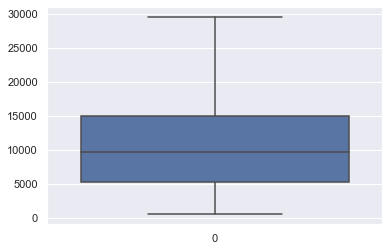


Boxplot for funded_amnt
-------------------------


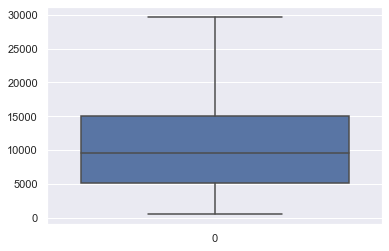


Boxplot for funded_amnt_inv
-------------------------


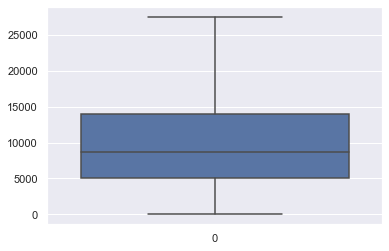


Boxplot for installment
-------------------------


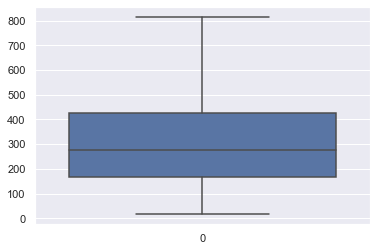


Boxplot for annual_inc
-------------------------


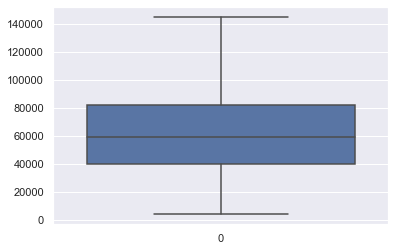


Boxplot for dti
-------------------------


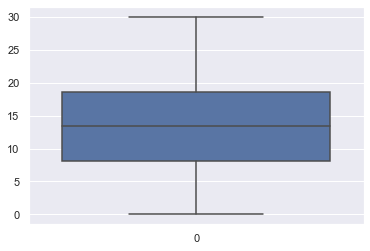


Boxplot for delinq_2yrs
-------------------------


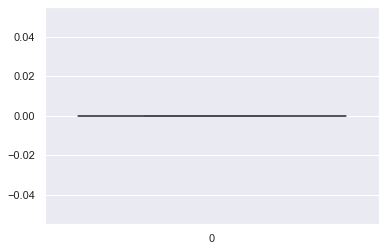


Boxplot for inq_last_6mths
-------------------------


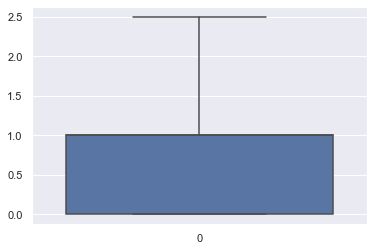


Boxplot for open_acc
-------------------------


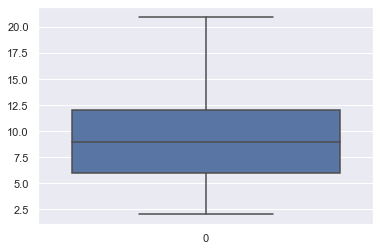


Boxplot for pub_rec
-------------------------


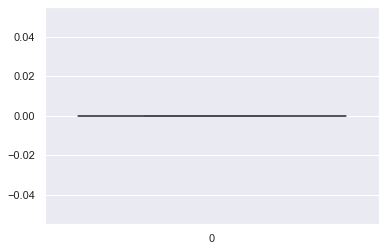


Boxplot for revol_bal
-------------------------


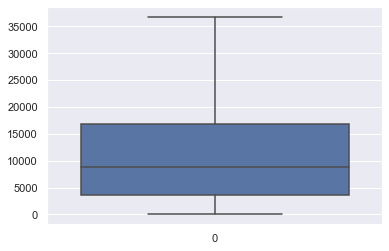


Boxplot for revol_util
-------------------------


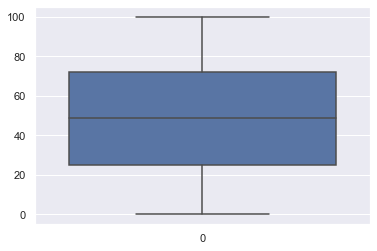


Boxplot for total_acc
-------------------------


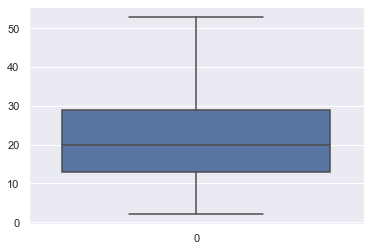


Boxplot for out_prncp
-------------------------


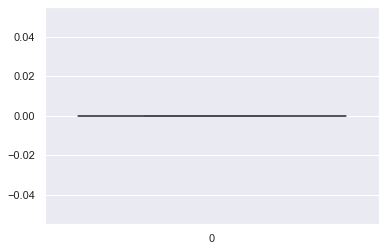


Boxplot for out_prncp_inv
-------------------------


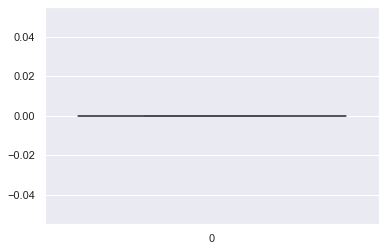


Boxplot for total_pymnt
-------------------------


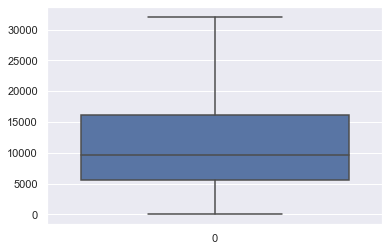


Boxplot for total_pymnt_inv
-------------------------


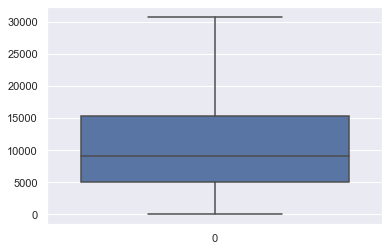


Boxplot for total_rec_prncp
-------------------------


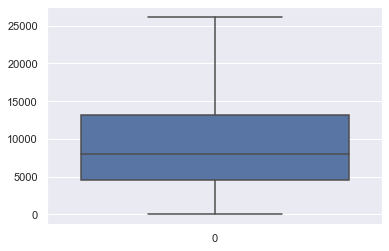


Boxplot for total_rec_int
-------------------------


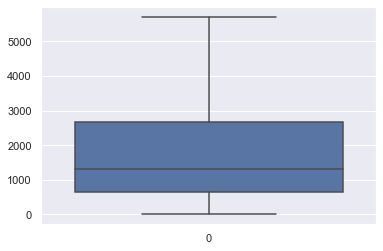


Boxplot for total_rec_late_fee
-------------------------


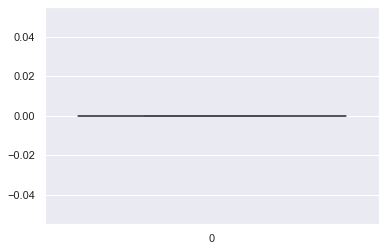


Boxplot for recoveries
-------------------------


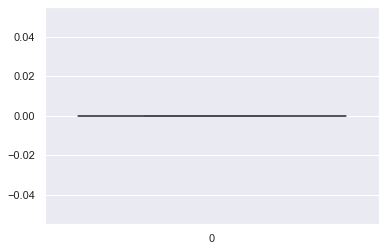


Boxplot for collection_recovery_fee
-------------------------


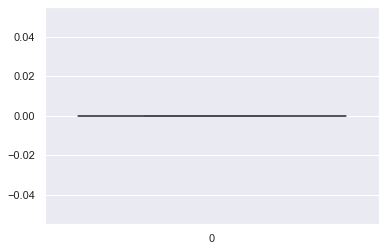


Boxplot for last_pymnt_amnt
-------------------------


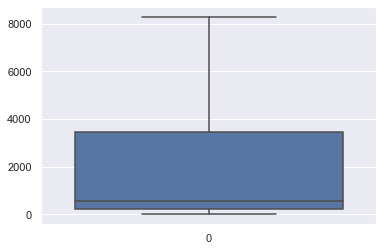


Boxplot for policy_code
-------------------------


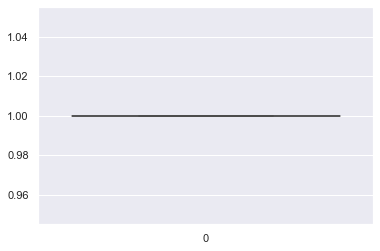


Boxplot for acc_now_delinq
-------------------------


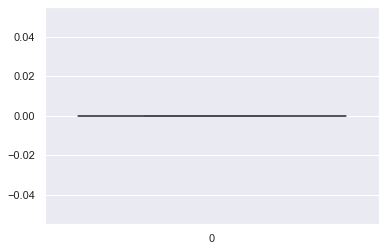


Boxplot for delinq_amnt
-------------------------


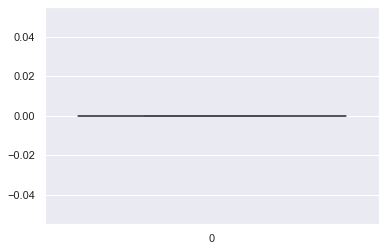


Boxplot for pub_rec_bankruptcies
-------------------------


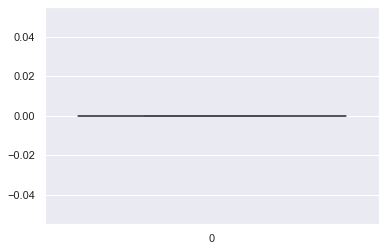


Boxplot for delinquency_history
-------------------------


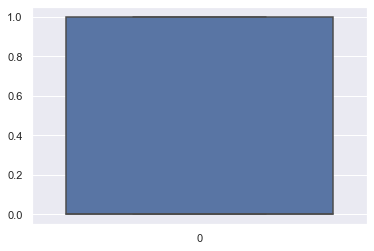

In [56]:
#plotting boxplot
import seaborn as sns
for i in loan_data_numerical_columns_winsorized.columns:
  print('Boxplot for', i)
  print('-------------------------')
  #plotting chart
  sns.boxplot(data=loan_data_numerical_columns_winsorized[i].values)
  plt.show()
  print('')

There are some columns for which the variance is almost zero, i.e. all the rows have same value. Observing from above table and boxplot, following columns needs to be analyzed : delinq_2yrs,pub_rec,out_prncp,out_prncp_inv,total_rec_late_fee,recoveries,collection_recovery_fee,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies.

In [57]:
#creating a list of clumns to analyze
analyze_col = []
for i in outliers_winsorized[outliers_winsorized['IQR']==0]['Feature']:
    analyze_col.append(i)

In [58]:
#checking value_count for columns that needs be analyzed
for i in analyze_col:
    print(loan_data_numerical_columns_winsorized[i].value_counts())
    print('-------------------------')

0.0    38577
Name: delinq_2yrs, dtype: int64
-------------------------
0.0    38577
Name: pub_rec, dtype: int64
-------------------------
0.0    38577
Name: out_prncp, dtype: int64
-------------------------
0.0    38577
Name: out_prncp_inv, dtype: int64
-------------------------
0.0    38577
Name: total_rec_late_fee, dtype: int64
-------------------------
0.0    38577
Name: recoveries, dtype: int64
-------------------------
0.0    38577
Name: collection_recovery_fee, dtype: int64
-------------------------
1    38577
Name: policy_code, dtype: int64
-------------------------
0    38577
Name: acc_now_delinq, dtype: int64
-------------------------
0    38577
Name: delinq_amnt, dtype: int64
-------------------------
0.0    38577
Name: pub_rec_bankruptcies, dtype: int64
-------------------------


Since  'delinq_2yrs', 'pub_rec', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
 'policy_code', 'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies' have same values in all the rows. We will drop thee coumns.

In [59]:
#dropping columns
for i in analyze_col:
    loan_data_eda_winsorized.drop(i, axis = 1, inplace = True)

In [60]:
#checking shape of loan_data_eda_winsorized
loan_data_eda_winsorized.shape

(38577, 34)

In [61]:
#previewing data
loan_data_eda_winsorized.head().transpose()

0  \
loan_amnt                                                       5000.0   
funded_amnt                                                     5000.0   
funded_amnt_inv                                                 4975.0   
term                                                         36 months   
int_rate                                                        10.65%   
installment                                                     162.87   
grade                                                                B   
sub_grade                                                           B2   
emp_length                                                   10+ years   
home_ownership                                                    RENT   
annual_inc                                                     24000.0   
verification_status                                           Verified   
issue_d                                                         Dec-11   
loan_status                                                 Fully Paid   
pymnt_plan                                                           n   
url                  https://lendingclub.com/browse/loanDetail.acti...   
purpose                                                    credit_card   
zip_code                                                         860xx   
addr_state                                                          AZ   
dti                                                              27.65   
earliest_cr_line                                                Jan-85   
inq_last_6mths                                                     1.0   
open_acc                                                           3.0   
revol_bal                                                      13648.0   
revol_util                                                        84.0   
total_acc                                                          9.0   
initial_list_status                                                  f   
total_pymnt                                                5863.155187   
total_pymnt_inv                                                5833.84   
total_rec_prncp                                                 5000.0   
total_rec_int                                                   863.16   
last_pymnt_amnt                                                 171.62   
application_type                                            INDIVIDUAL   
delinquency_history                                                  0   

                                                                     1  \
loan_amnt                                                       2500.0   
funded_amnt                                                     2500.0   
funded_amnt_inv                                                 2500.0   
term                                                         60 months   
int_rate                                                        15.27%   
installment                                                      59.83   
grade                                                                C   
sub_grade                                                           C4   
emp_length                                                    < 1 year   
home_ownership                                                    RENT   
annual_inc                                                     30000.0   
verification_status                                    Source Verified   
issue_d                                                         Dec-11   
loan_status                                                Charged Off   
pymnt_plan                                                           n   
url                  https://lendingclub.com/browse/loanDetail.acti...   
purpose                                                            car   
zip_code                                                         309xx   
addr_state                                                          GA  

## Analysing Object DataType

In [62]:
# selecting categorical columns from winsorized data
loan_data_categorical_columns_winsorized = loan_data_eda_winsorized.select_dtypes(include=object)

In [63]:
loan_data_categorical_columns_winsorized.head()

term int_rate grade sub_grade emp_length home_ownership  \
0   36 months   10.65%     B        B2  10+ years           RENT   
1   60 months   15.27%     C        C4   < 1 year           RENT   
2   36 months   15.96%     C        C5  10+ years           RENT   
3   36 months   13.49%     C        C1  10+ years           RENT   
5   36 months    7.90%     A        A4    3 years           RENT   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
5     Source Verified  Dec-11   Fully Paid          n   

                                                 url         purpose zip_code  \
0  https://lendingclub.com/browse/loanDetail.acti...     credit_card    860xx   
1  https://lendingclub.com/browse/loanDetail.acti...             car    309xx   
2  https://lendingclub.com/browse/loanDetail.acti...  small_business    606xx   
3  https://lendingclub.com/browse/loanDetail.acti...           other    917xx   
5  https://lendingclub.com/browse/loanDetail.acti...         wedding    852xx   

  addr_state earliest_cr_line initial_list_status application_type  
0         AZ           Jan-85                   f       INDIVIDUAL  
1         GA           Apr-99                   f       INDIVIDUAL  
2         IL           Nov-01                   f       INDIVIDUAL  
3         CA           Feb-96                   f       INDIVIDUAL  
5         AZ           Nov-04                   f       INDIVIDUAL

In [64]:
#checking value_count for columns that needs be analyzed
for i in loan_data_categorical_columns_winsorized.columns:
    print(loan_data_categorical_columns_winsorized[i].value_counts())
    print('-------------------------')

 36 months    29096
 60 months     9481
Name: term, dtype: int64
-------------------------
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
12.42%    403
10.65%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    344
7.14%     341
6.99%     336
11.11%    331
12.53%    327
10.74%    311
6.54%     305
6.91%     303
16.77%    294
8.94%     294
7.66%     292
13.61%    291
13.98%    284
13.23%    263
15.99%    259
11.12%    259
6.17%     252
12.68%    251
10.75%    250
10.36%    250
10.00%    249
11.36%    247
13.99%    241
11.83%    233
10.62%    228
10.38%    219
13.06%    219
10.25%    218
16.49%    218
14.96%    214
15.65%    208
18.25%    207
11.14%    206
6.92%     204
12.18%    203
15.23%    200
15.95%    199
14.65%    198

There are different categorical columns that needs either a type conversion or are not important for our analysis and will be dropped. 

Columns needing type casting:

1. int_rate


Columns that needs to be dropped:
1. application_type (Reason : zero variance)
2. initial_list_status (Reason : zero variance)
3. earliest_cr_line (Reason : not relevant to credit decision)
4. zip_code (Reason : not relevant to credit decision)
5. url (Reason : not relevant to credit decision)
6. pymnt_plan (Reason : zero variance)
7. issue_d (Reason : not relevant to credit decision)
8. last_pymnt_amnt (Reason : not relevant to credit decision) 

In [65]:
#creating list of names of castegorical columns to be dropped
cat_col_drop = ['application_type','initial_list_status','earliest_cr_line','zip_code','url','pymnt_plan','issue_d','last_pymnt_amnt']

#dropping columns
for i in cat_col_drop:
    loan_data_eda_winsorized.drop(i, axis = 1, inplace = True)

In [66]:
#we will convert this int_rate from object to float data type
loan_data_eda_winsorized['int_rate'] = loan_data_eda_winsorized['int_rate'].apply(lambda x : round(float(x[:-1]),0))

In [67]:
#validating shape of data
loan_data_eda_winsorized.shape

(38577, 26)

In [68]:
#printing data sample
loan_data_eda_winsorized.head().transpose()

0                1               2  \
loan_amnt                 5000.0           2500.0          2400.0   
funded_amnt               5000.0           2500.0          2400.0   
funded_amnt_inv           4975.0           2500.0          2400.0   
term                   36 months        60 months       36 months   
int_rate                    11.0             15.0            16.0   
installment               162.87            59.83           84.33   
grade                          B                C               C   
sub_grade                     B2               C4              C5   
emp_length             10+ years         < 1 year       10+ years   
home_ownership              RENT             RENT            RENT   
annual_inc               24000.0          30000.0         12252.0   
verification_status     Verified  Source Verified    Not Verified   
loan_status           Fully Paid      Charged Off      Fully Paid   
purpose              credit_card              car  small_business   
addr_state                    AZ               GA              IL   
dti                        27.65              1.0            8.72   
inq_last_6mths               1.0              2.5             2.0   
open_acc                     3.0              3.0             2.0   
revol_bal                13648.0           1687.0          2956.0   
revol_util                  84.0              9.0            98.0   
total_acc                    9.0              4.0            10.0   
total_pymnt          5863.155187          1008.71     3005.666844   
total_pymnt_inv          5833.84          1008.71         3005.67   
total_rec_prncp           5000.0           456.46          2400.0   
total_rec_int             863.16           435.17          605.67   
delinquency_history            0                0               0   

                                   3                5  
loan_amnt                    10000.0           5000.0  
funded_amnt                  10000.0           5000.0  
funded_amnt_inv              10000.0           5000.0  
term                       36 months        36 months  
int_rate                        13.0              8.0  
installment                   339.31           156.46  
grade                              C                A  
sub_grade                         C1               A4  
emp_length                 10+ years          3 years  
home_ownership                  RENT             RENT  
annual_inc                   49200.0          36000.0  
verification_status  Source Verified  Source Verified  
loan_status               Fully Paid       Fully Paid  
purpose                        other          wedding  
addr_state                        CA               AZ  
dti                             20.0             11.2  
inq_last_6mths                   1.0              2.5  
open_acc                        10.0              9.0  
revol_bal                     5598.0           7963.0  
revol_util                      21.0             28.0  
total_acc                       37.0             12.0  
total_pymnt                 12231.89          5632.21  
total_pymnt_inv             12231.89          5632.21  
total_rec_prncp              10000.0           5000.0  
total_rec_int                2214.92           632.21  
delinquency_history                1                0

In [69]:
#creating a list of customer behaviourial variables
#since the customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

cust_behav_feature = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp',
'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

#dropping columns
for i in cust_behav_feature:
    if i in loan_data_eda_winsorized.columns:
        loan_data_eda_winsorized.drop(i, axis = 1, inplace = True)
    else:
        continue

In [70]:
loan_data_eda_winsorized.shape

(38577, 17)

## Univariate Analysis

We will now perform univariate analysis of each of the feature, and try to understand them.

### loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [71]:
#getting statistical description
loan_data_eda_winsorized['loan_amnt'].describe()

count    38577.000000
mean     10947.966405
std       7058.665784
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      29550.000000
Name: loan_amnt, dtype: float64

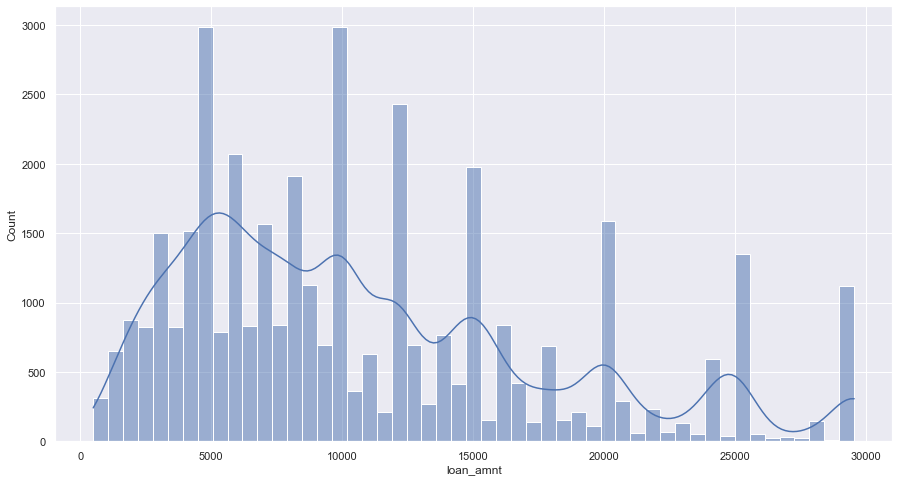

In [72]:
#plotting histogram for loan_amnt
plt.figure(figsize = (15,8))
sns.histplot(loan_data_eda_winsorized['loan_amnt'], kde=True)
plt.show()

### funded_amnt : The total amount committed to that loan at that point in time.

In [73]:
#getting statistical description
loan_data_eda_winsorized['funded_amnt'].describe()

count    38577.000000
mean     10704.896052
std       6846.906958
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      29700.000000
Name: funded_amnt, dtype: float64

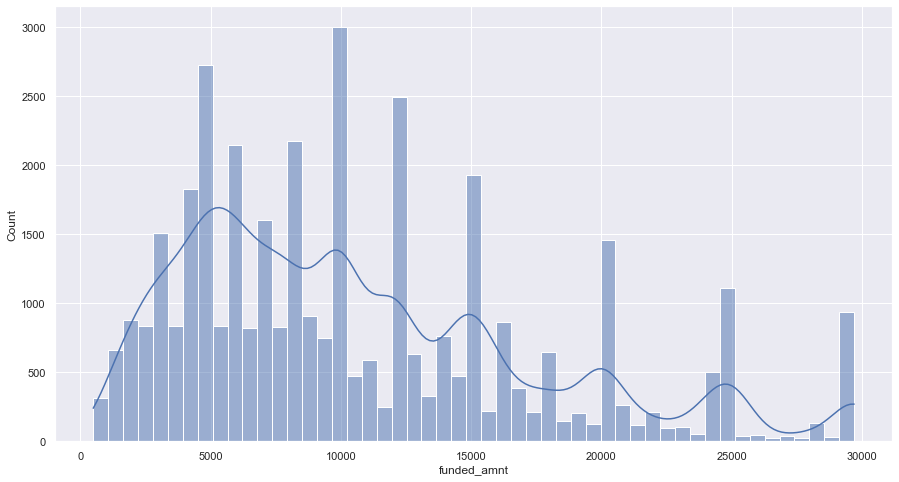

In [74]:
#plotting histogram for loan_amnt
plt.figure(figsize = (15,8))
sns.histplot(loan_data_eda_winsorized['funded_amnt'], kde=True)
plt.show()

### funded_amnt_inv : The total amount committed by investors for that loan at that point in time.

In [75]:
#getting statistical description
loan_data_eda_winsorized['funded_amnt_inv'].describe()

count    38577.000000
mean     10101.974826
std       6663.113367
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      27500.000000
Name: funded_amnt_inv, dtype: float64

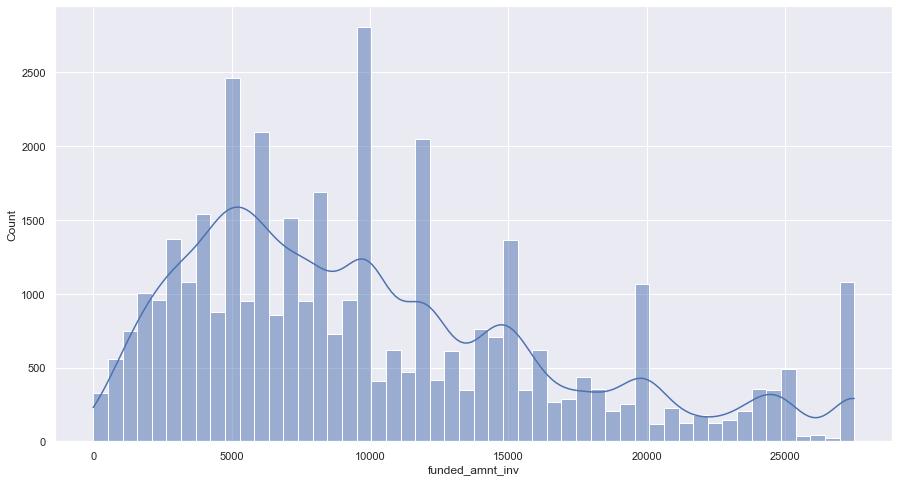

In [76]:
#plotting histogram for funded_amnt_inv
plt.figure(figsize = (15,8))
sns.histplot(loan_data_eda_winsorized['funded_amnt_inv'], kde=True)
plt.show()

### term : The number of payments on the loan. Values are in months and can be either 36 or 60.

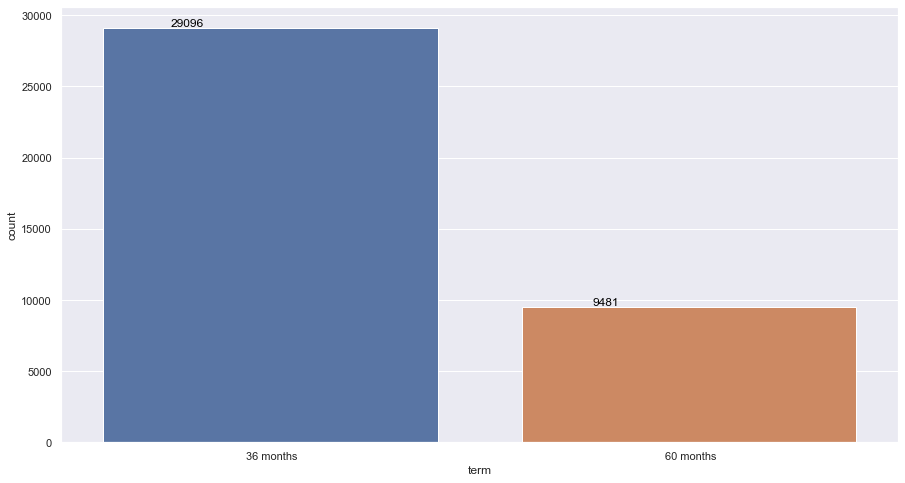

In [77]:
#countplot for term column
plt.figure(figsize = (15,8))
ax = sns.countplot(x="term", data=loan_data_eda_winsorized)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

### int_rate : Interest Rate on the loan

In [78]:
#getting statistical description
loan_data_eda_winsorized['int_rate'].value_counts()

11.0    4953
13.0    4602
10.0    3398
8.0     3367
7.0     3267
12.0    3104
14.0    2835
16.0    2614
15.0    2546
6.0     1530
9.0     1504
17.0    1411
18.0    1095
19.0     788
5.0      573
20.0     446
21.0     308
22.0     171
23.0      42
24.0      23
Name: int_rate, dtype: int64

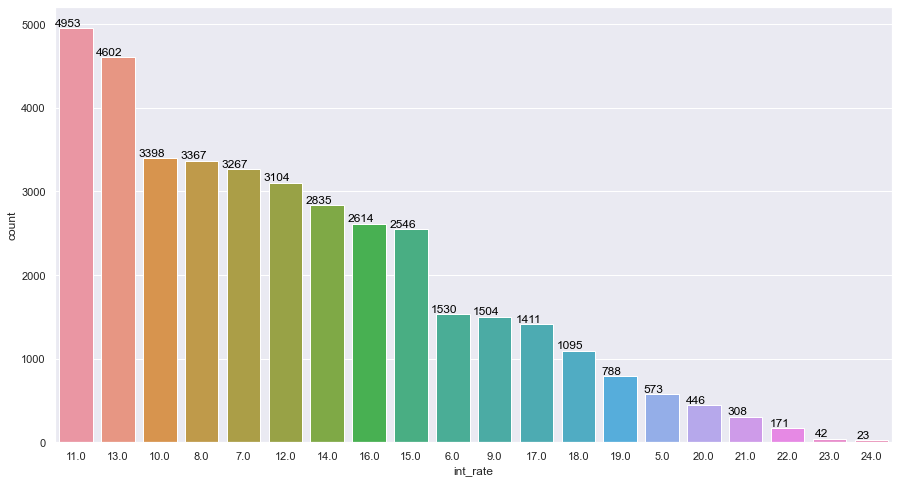

In [79]:
#countplot for int_rate column
plt.figure(figsize = (15,8))
ax = sns.countplot(x="int_rate", data=loan_data_eda_winsorized, order = loan_data_eda_winsorized['int_rate'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

### installment : The monthly payment owed by the borrower if the loan originates. 

In [80]:
#getting statistical description
loan_data_eda_winsorized['installment'].describe()

count    38577.000000
mean       318.767660
std        197.579507
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max        815.265000
Name: installment, dtype: float64

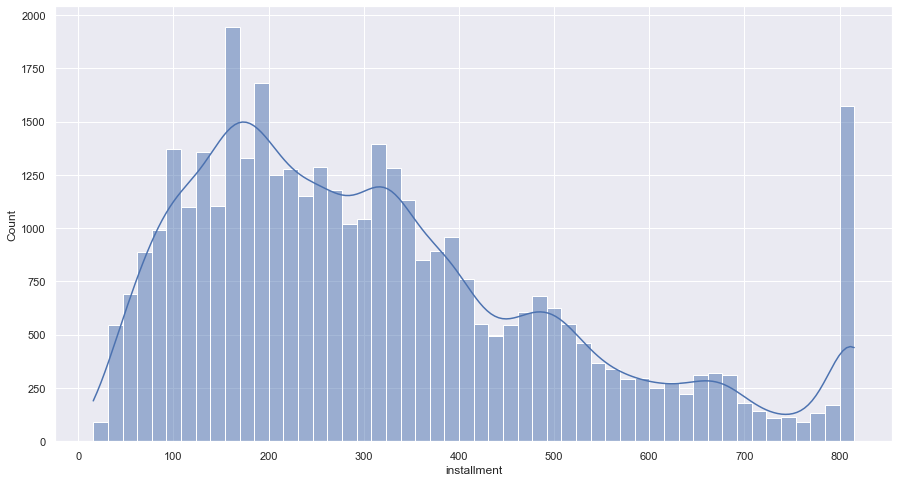

In [81]:
#plotting histogram for installment
plt.figure(figsize = (15,8))
sns.histplot(loan_data_eda_winsorized['installment'], kde=True)
plt.show()

### grade : LC assigned loan grade

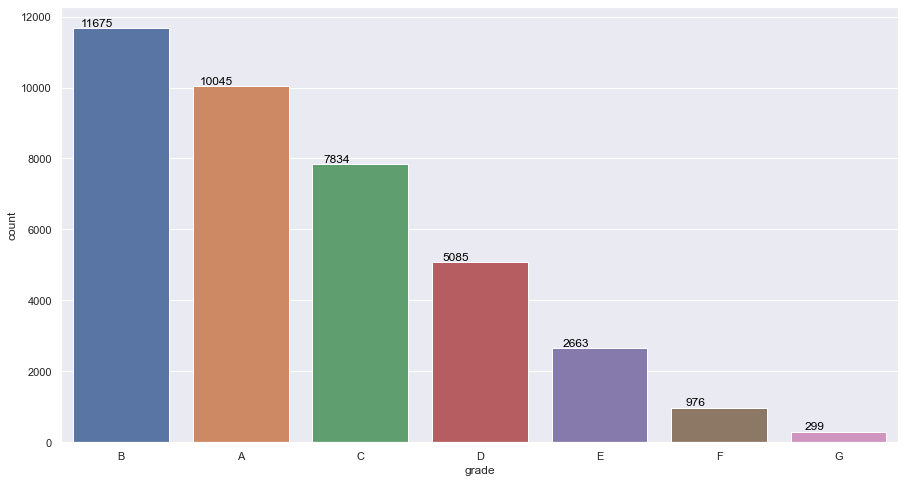

In [82]:
#countplot for grade column
plt.figure(figsize = (15,8))
ax = sns.countplot(x="grade", data=loan_data_eda_winsorized,order = loan_data_eda_winsorized['grade'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

### sub_grade :  LC assigned loan subgrade

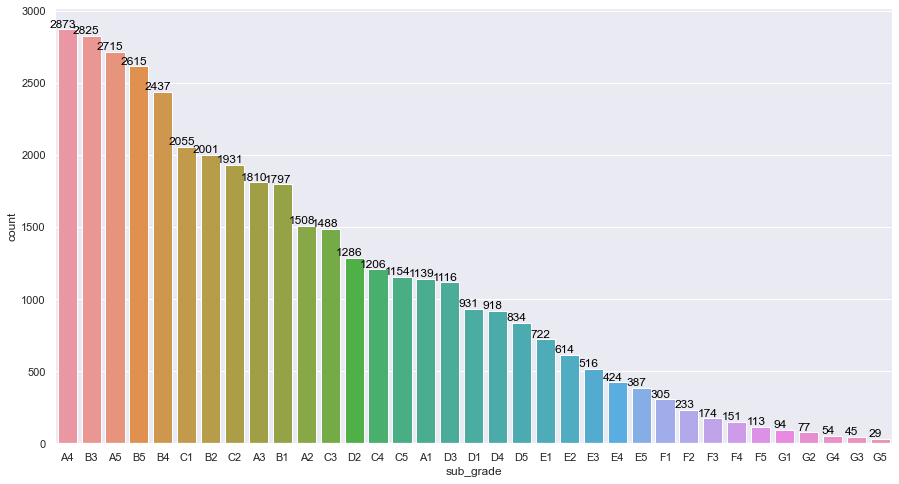

In [83]:
#countplot for sub_grade column
plt.figure(figsize = (15,8))
ax = sns.countplot(x="sub_grade",data=loan_data_eda_winsorized, order = loan_data_eda_winsorized['sub_grade'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

### emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

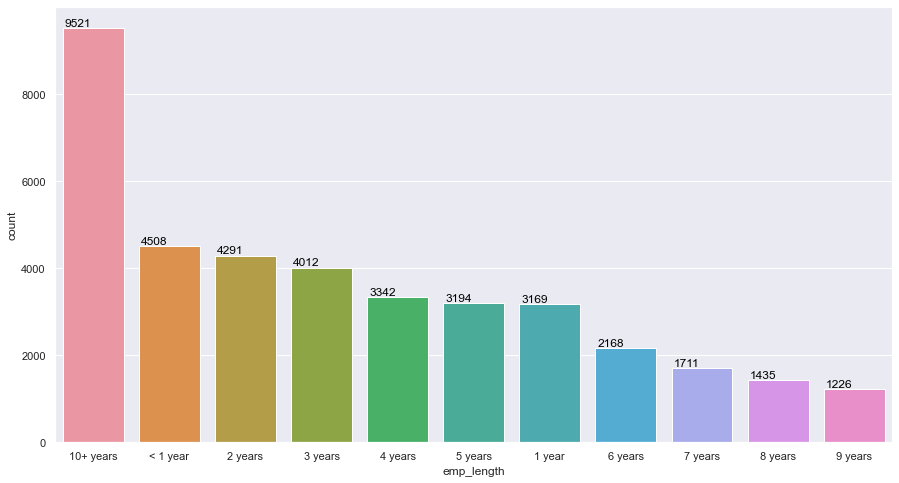

In [84]:
#countplot for emp_length column
plt.figure(figsize = (15,8))
ax = sns.countplot(x="emp_length",data=loan_data_eda_winsorized, order = loan_data_eda_winsorized['emp_length'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

### home_ownership : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

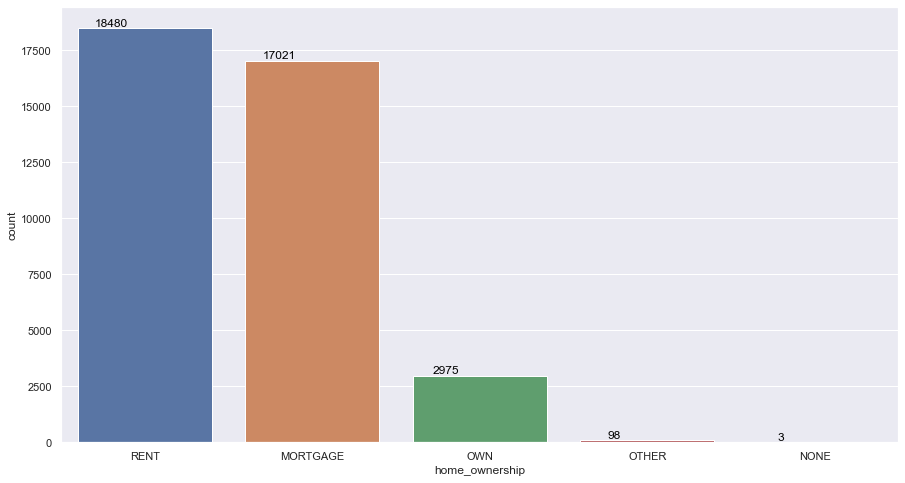

In [85]:
#countplot for home_ownership column
plt.figure(figsize = (15,8))
ax = sns.countplot(x="home_ownership",data=loan_data_eda_winsorized, order = loan_data_eda_winsorized['home_ownership'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

### annual_inc : The self-reported annual income provided by the borrower during registration.

In [86]:
#getting statistical description
loan_data_eda_winsorized['annual_inc'].describe()

count     38577.000000
mean      65044.917784
std       32652.937415
min        4000.000000
25%       40000.000000
50%       58868.000000
75%       82000.000000
max      145000.000000
Name: annual_inc, dtype: float64

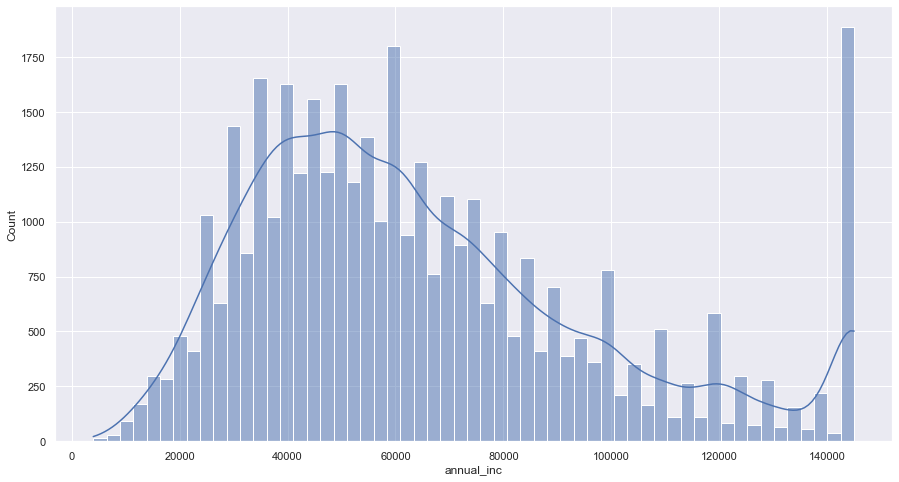

In [87]:
#plotting histogram for annual_inc
plt.figure(figsize = (15,8))
sns.histplot(loan_data_eda_winsorized['annual_inc'], kde=True)
plt.show()

### verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified

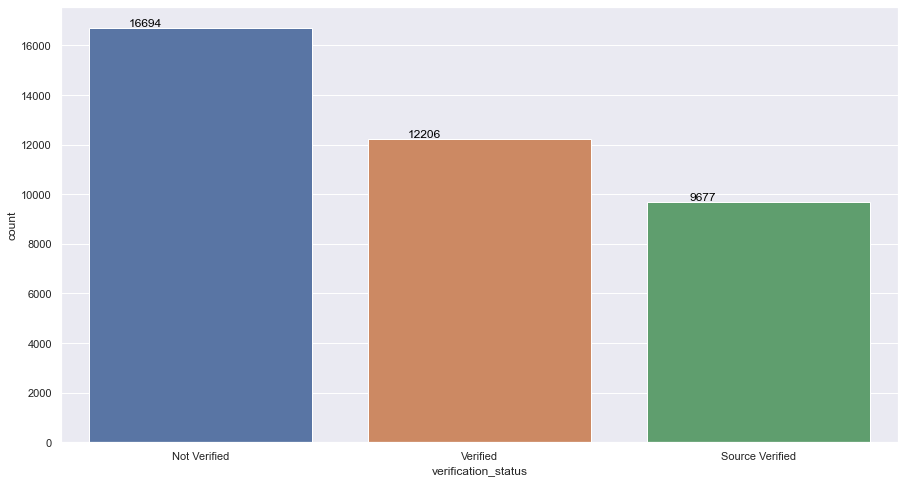

In [88]:
#countplot for verification_status column
plt.figure(figsize = (15,8))
ax = sns.countplot(x="verification_status",data=loan_data_eda_winsorized, order = loan_data_eda_winsorized['verification_status'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

### loan_status : Current status of the loan

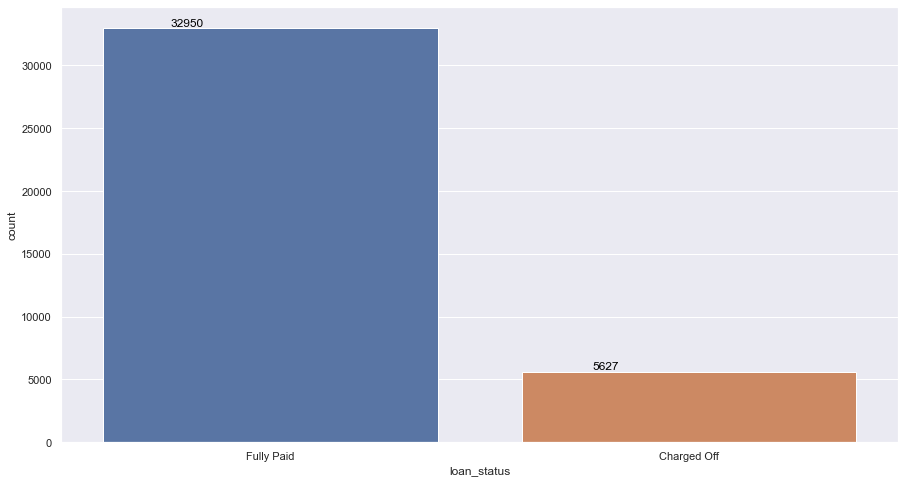

In [89]:
#countplot for loan_status column
plt.figure(figsize = (15,8))
ax = sns.countplot(x="loan_status",data=loan_data_eda_winsorized, order = loan_data_eda_winsorized['loan_status'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

### purpose : A category provided by the borrower for the loan request. 

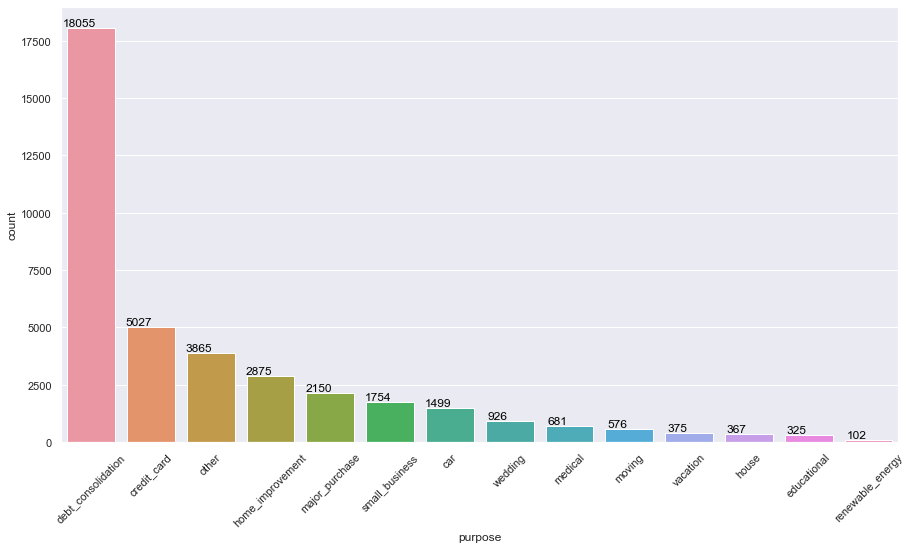

In [90]:
#countplot for purpose column
plt.figure(figsize = (15,8))
ax = sns.countplot(x="purpose",data=loan_data_eda_winsorized, order = loan_data_eda_winsorized['purpose'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.xticks(rotation=45)
plt.show()

### addr_state : The state provided by the borrower in the loan application

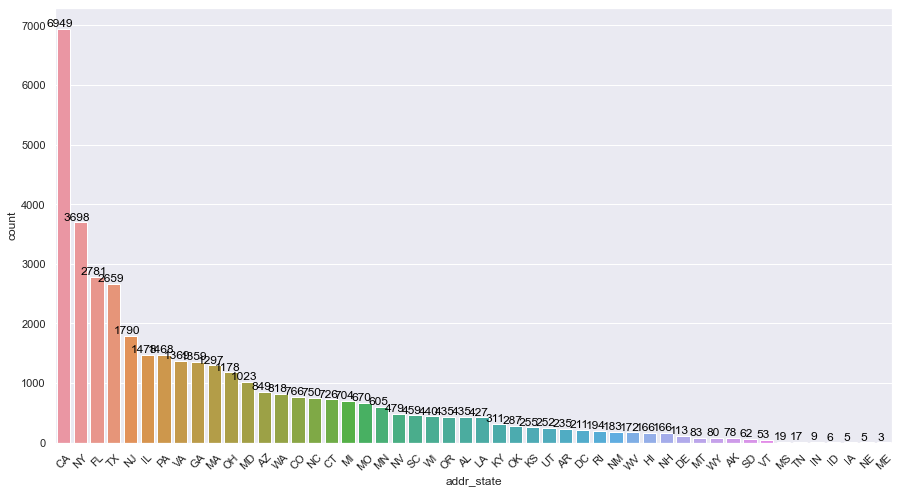

In [116]:
#countplot for addr_state column
plt.figure(figsize = (15,8))
ax = sns.countplot(x="addr_state",data=loan_data_eda_winsorized, order = loan_data_eda_winsorized['addr_state'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.xticks(rotation=45)
plt.show()

### dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [117]:
#getting statistical description
loan_data_eda_winsorized['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

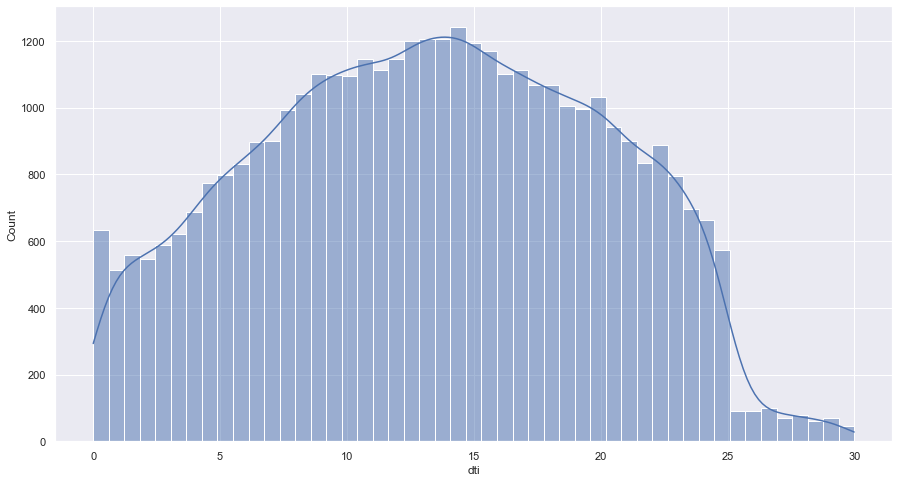

In [118]:
#plotting histogram for annual_inc
plt.figure(figsize = (15,8))
sns.histplot(loan_data_eda_winsorized['dti'], kde=True)
plt.show()

### delinquency_history : Whether the customer has any history of deliquency.

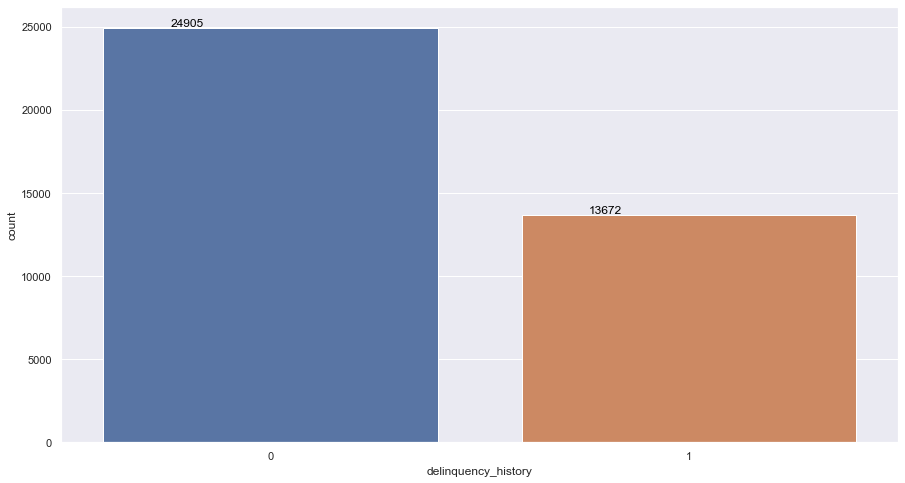

In [119]:
#countplot for delinquency_history column
plt.figure(figsize = (15,8))
ax = sns.countplot(x="delinquency_history",data=loan_data_eda_winsorized, order = loan_data_eda_winsorized['delinquency_history'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)

plt.show()

## Bi-Variate Analysis

Goal of our analysis is to see how loan status is varying with respect to different factors.

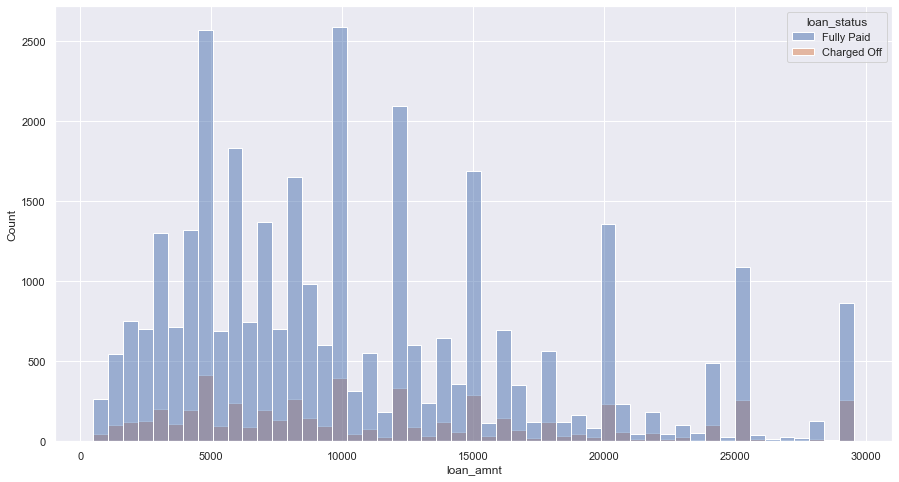

In [120]:
#plotting histogram for loan_amnt
plt.figure(figsize = (15,8))
sns.histplot(data = loan_data_eda_winsorized, x='loan_amnt', hue='loan_status')
#sns.histplot(loan_data_eda_winsorized['funded_amnt'], kde=True)
plt.show()

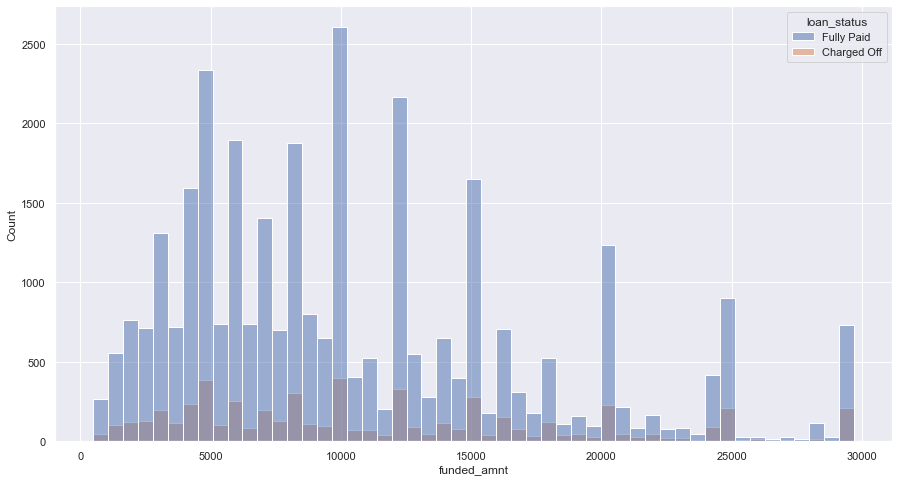

In [121]:
#plotting histogram for funded_amnt
plt.figure(figsize = (15,8))
sns.histplot(data = loan_data_eda_winsorized, x='funded_amnt', hue='loan_status')
#sns.histplot(loan_data_eda_winsorized['funded_amnt'], kde=True)
plt.show()

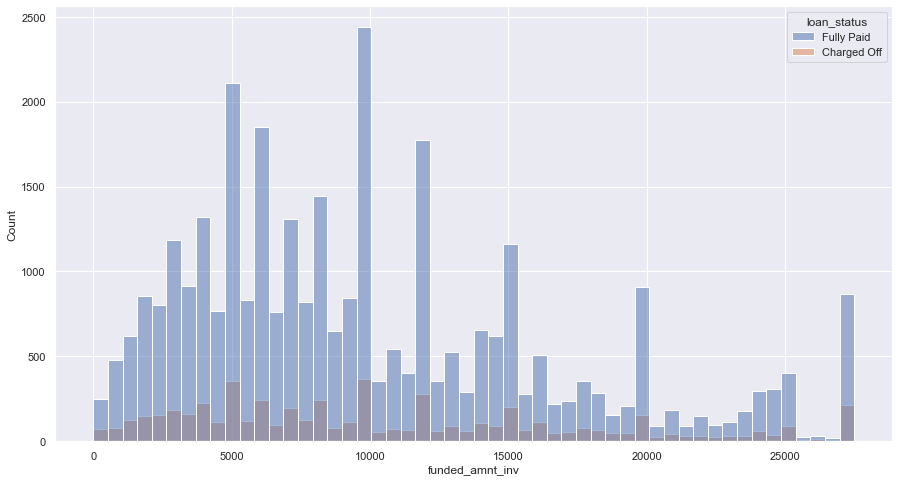

In [122]:
#plotting histogram for funded_amnt_inv
plt.figure(figsize = (15,8))
sns.histplot(data = loan_data_eda_winsorized, x='funded_amnt_inv', hue='loan_status')
#sns.histplot(loan_data_eda_winsorized['funded_amnt'], kde=True)
plt.show()

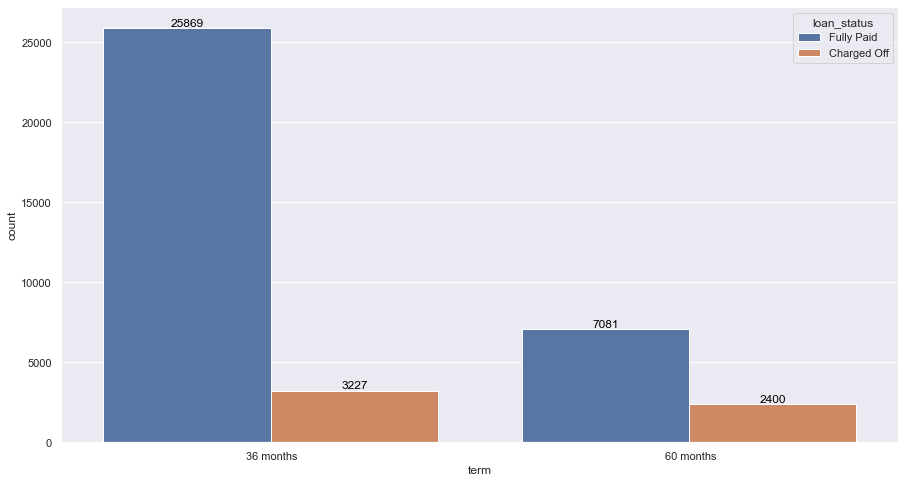

In [123]:
#countplot for term column with loan_status
plt.figure(figsize = (15,8))
ax = sns.countplot(x="term", data=loan_data_eda_winsorized, hue = "loan_status")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

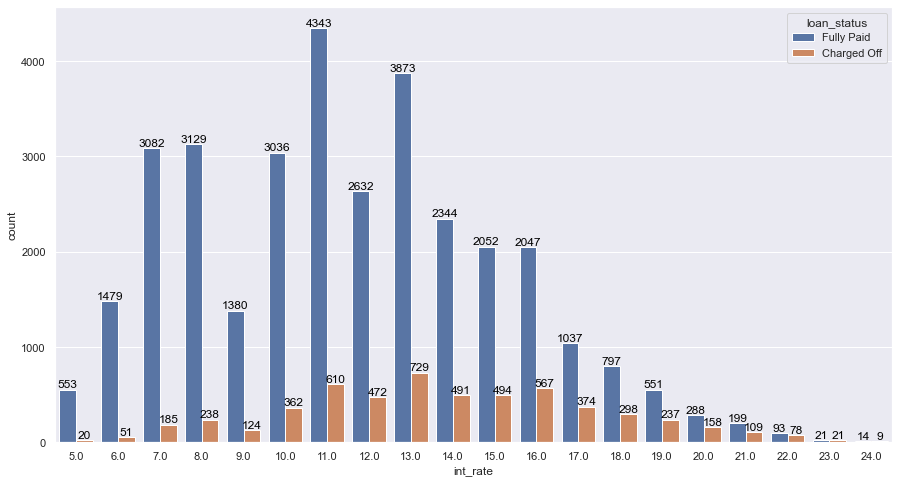

In [124]:
#countplot for int_rate with loan_status
plt.figure(figsize = (15,8))
ax = sns.countplot(x="int_rate", data=loan_data_eda_winsorized, hue = "loan_status")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

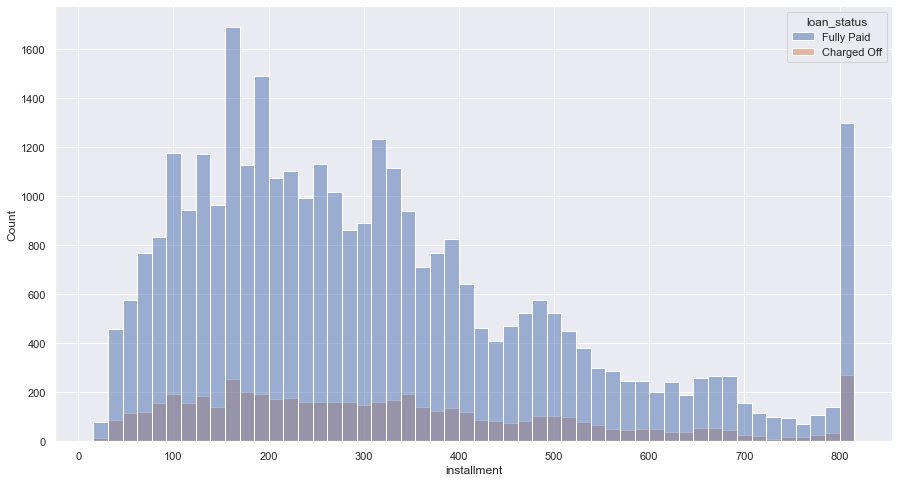

In [125]:
#plotting histogram for installment with loan_status
plt.figure(figsize = (15,8))
sns.histplot(data = loan_data_eda_winsorized, x='installment', hue='loan_status')
plt.show()

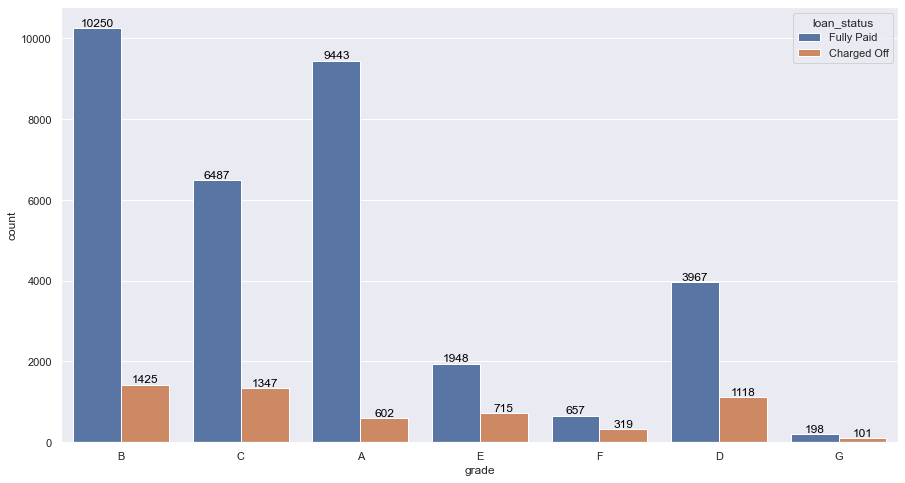

In [126]:
#countplot for grade column with lan_status
plt.figure(figsize = (15,8))
ax = sns.countplot(x="grade", data=loan_data_eda_winsorized, hue = "loan_status" )
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

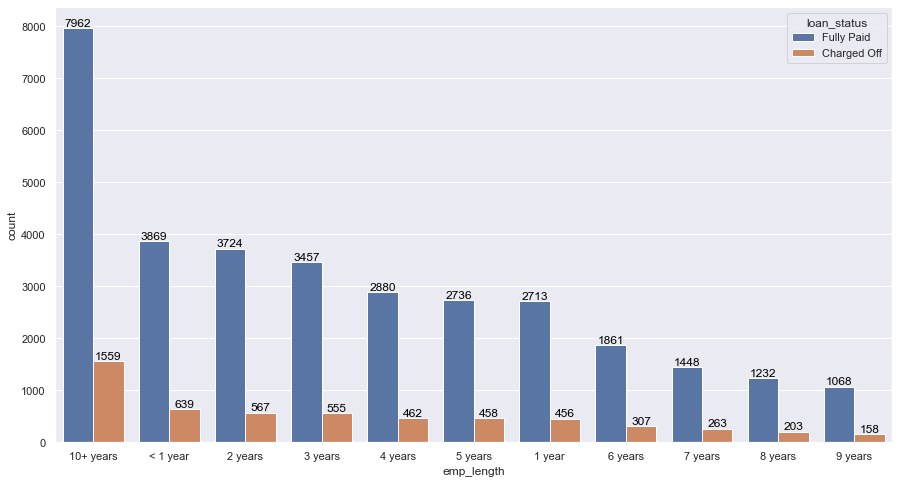

In [127]:
#countplot for emp_length column with loan_status
plt.figure(figsize = (15,8))
ax = sns.countplot(x="emp_length",data=loan_data_eda_winsorized,hue = 'loan_status', order = loan_data_eda_winsorized['emp_length'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

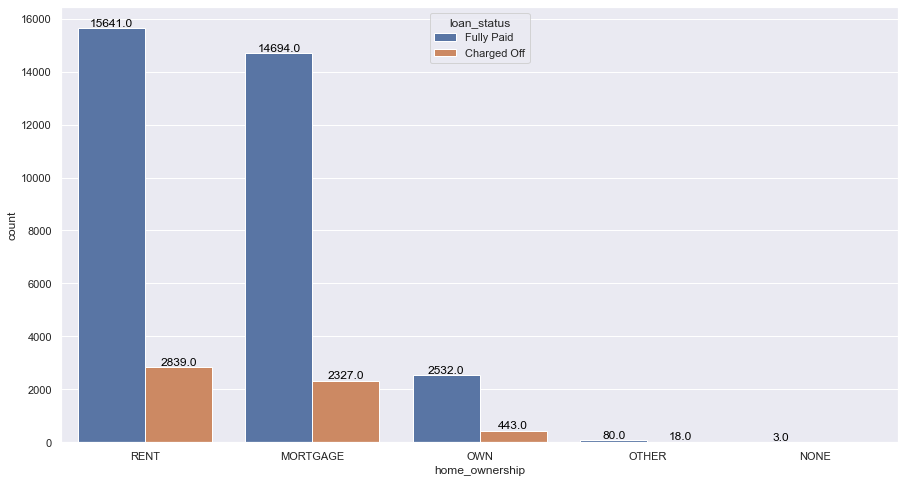

In [128]:
#countplot for home_ownership column with loan status
plt.figure(figsize = (15,8))
ax = sns.countplot(x="home_ownership",data=loan_data_eda_winsorized,hue = 'loan_status', order = loan_data_eda_winsorized['home_ownership'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

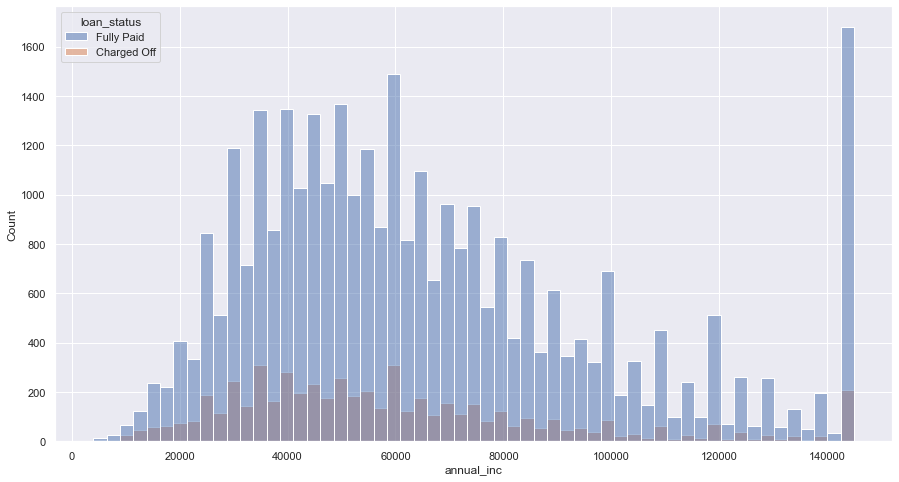

In [129]:
#plotting histogram for annual_inc with loan_status
plt.figure(figsize = (15,8))
sns.histplot(data = loan_data_eda_winsorized, x='annual_inc', hue='loan_status')
plt.show()

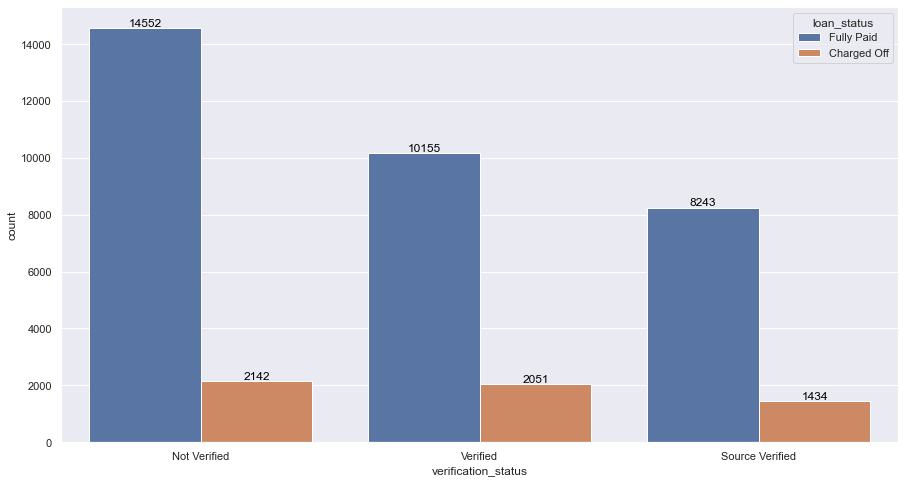

In [130]:
#countplot for verification_status column with loan_status
plt.figure(figsize = (15,8))
ax = sns.countplot(x="verification_status",data=loan_data_eda_winsorized, hue='loan_status', order = loan_data_eda_winsorized['verification_status'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.show()

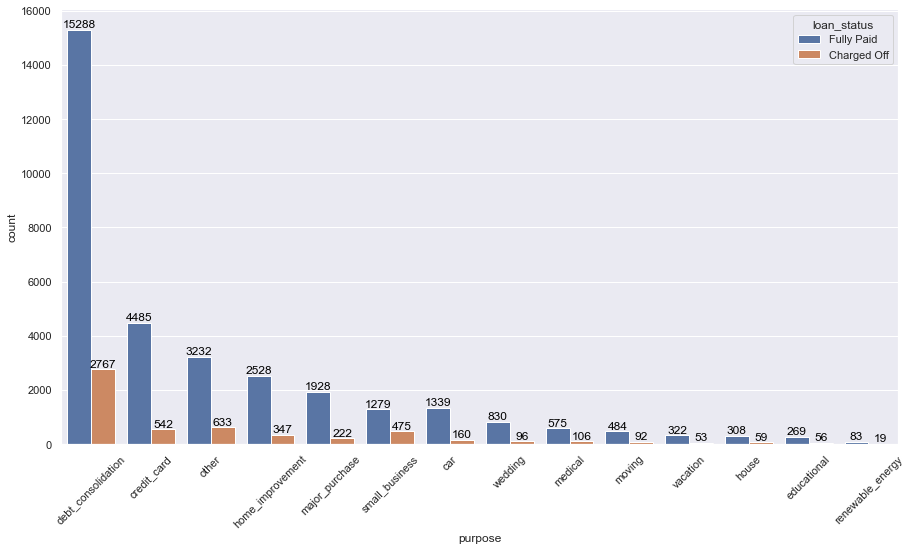

In [131]:
#countplot for purpose column and loan_status
plt.figure(figsize = (15,8))
ax = sns.countplot(x="purpose",data=loan_data_eda_winsorized,hue='loan_status', order = loan_data_eda_winsorized['purpose'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)
plt.xticks(rotation=45)
plt.show()

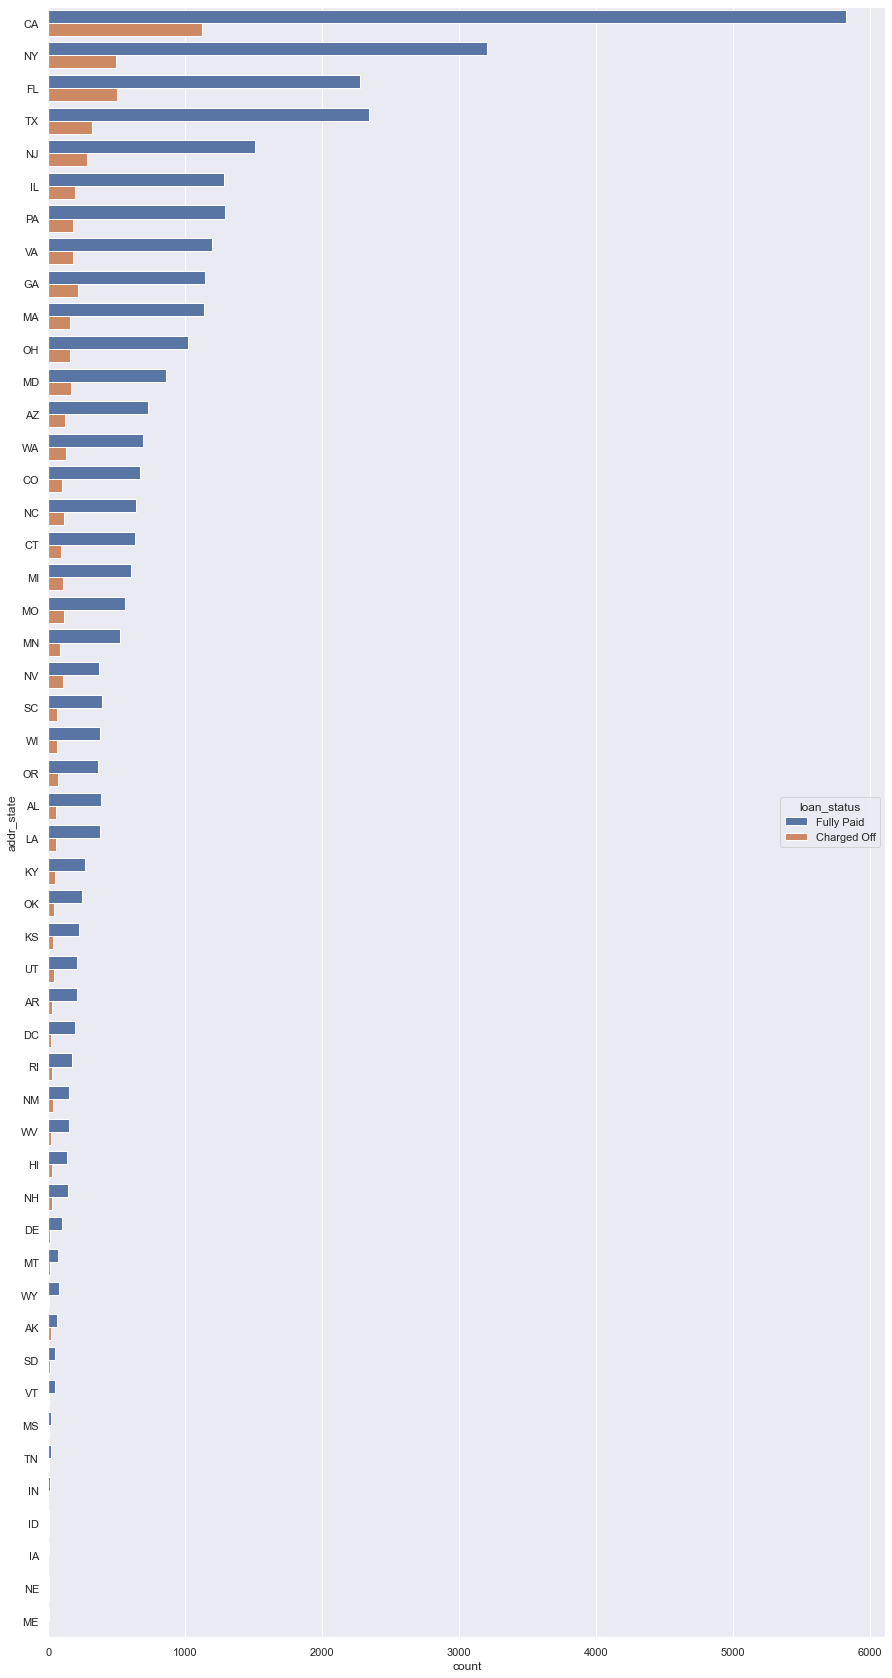

In [132]:
#countplot for addr_state column and loan_status
plt.figure(figsize = (15,30))
ax = sns.countplot(y="addr_state",data=loan_data_eda_winsorized, hue='loan_status', order = loan_data_eda_winsorized['addr_state'].value_counts().index)

plt.show()

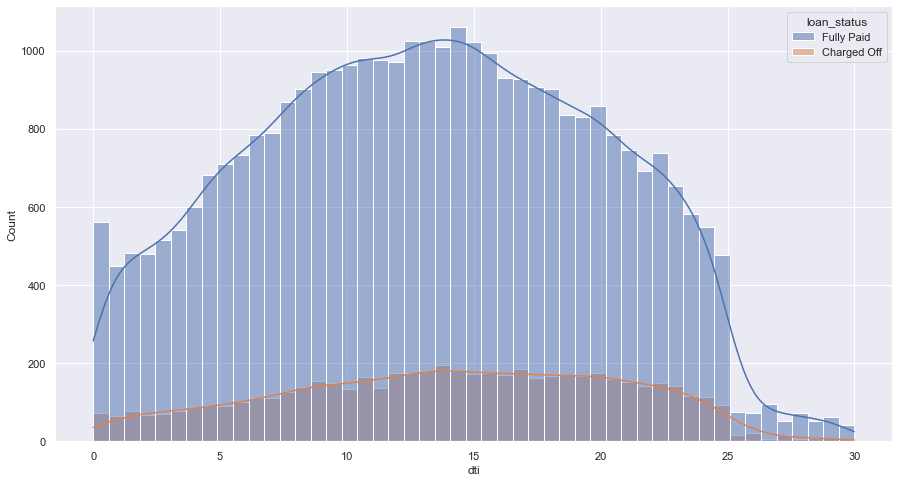

In [133]:
#plotting histogram for dti and loan_status
plt.figure(figsize = (15,8))
sns.histplot(data = loan_data_eda_winsorized, x='dti', hue='loan_status', kde = True)
plt.show()

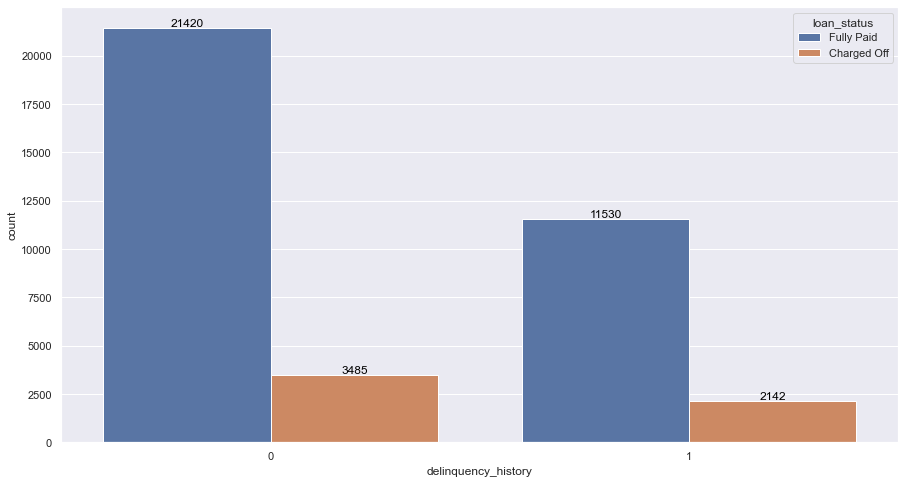

In [134]:
#countplot for delinquency_history column with loan_Status
plt.figure(figsize = (15,8))
ax = sns.countplot(x="delinquency_history",data=loan_data_eda_winsorized,hue='loan_status', order = loan_data_eda_winsorized['delinquency_history'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=12)

plt.show()

## Multivariate Analysis

In [135]:
loan_data_eda_winsorized.head().transpose()

0                1               2  \
loan_amnt                 5000.0           2500.0          2400.0   
funded_amnt               5000.0           2500.0          2400.0   
funded_amnt_inv           4975.0           2500.0          2400.0   
term                   36 months        60 months       36 months   
int_rate                    11.0             15.0            16.0   
installment               162.87            59.83           84.33   
grade                          B                C               C   
sub_grade                     B2               C4              C5   
emp_length             10+ years         < 1 year       10+ years   
home_ownership              RENT             RENT            RENT   
annual_inc               24000.0          30000.0         12252.0   
verification_status     Verified  Source Verified    Not Verified   
loan_status           Fully Paid      Charged Off      Fully Paid   
purpose              credit_card              car  small_business   
addr_state                    AZ               GA              IL   
dti                        27.65              1.0            8.72   
delinquency_history            0                0               0   

                                   3                5  
loan_amnt                    10000.0           5000.0  
funded_amnt                  10000.0           5000.0  
funded_amnt_inv              10000.0           5000.0  
term                       36 months        36 months  
int_rate                        13.0              8.0  
installment                   339.31           156.46  
grade                              C                A  
sub_grade                         C1               A4  
emp_length                 10+ years          3 years  
home_ownership                  RENT             RENT  
annual_inc                   49200.0          36000.0  
verification_status  Source Verified  Source Verified  
loan_status               Fully Paid       Fully Paid  
purpose                        other          wedding  
addr_state                        CA               AZ  
dti                             20.0             11.2  
delinquency_history                1                0

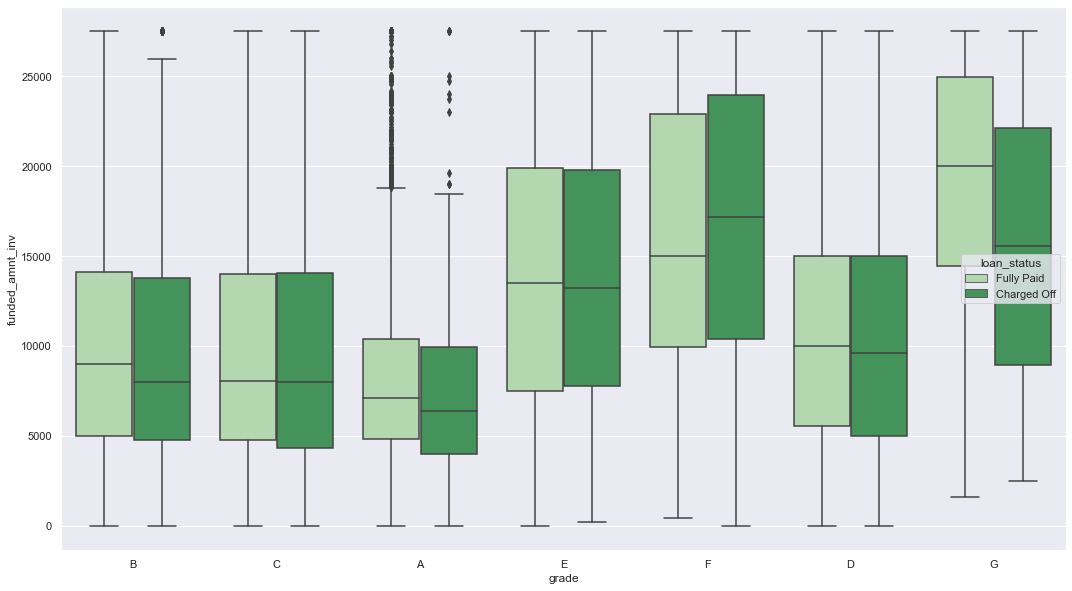

In [136]:
#plotting chart
plt.figure(figsize = (18,10))
sns.boxplot(data=loan_data_eda_winsorized, y="funded_amnt_inv", x='grade', hue ='loan_status', palette="Greens")
plt.show()

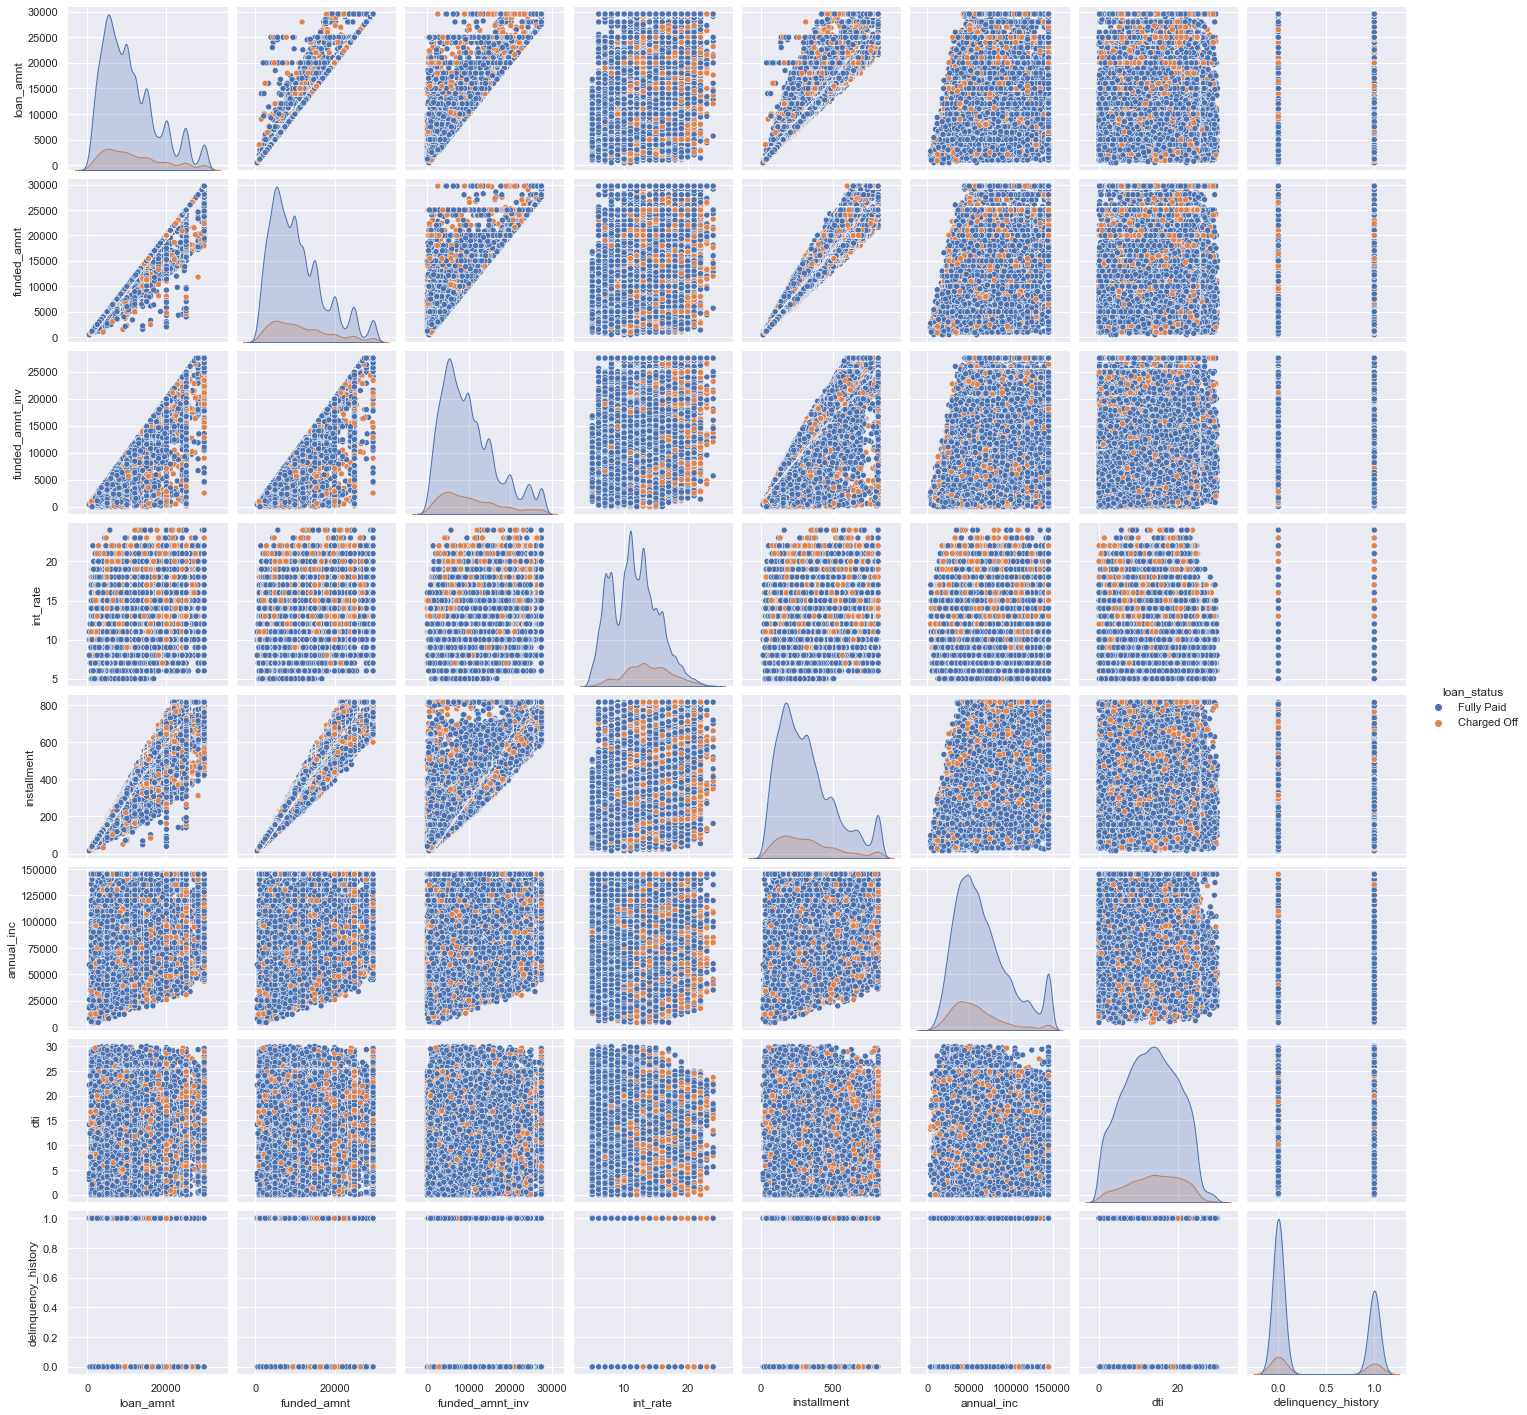

In [137]:
#plotting pairplot
sns.pairplot(loan_data_eda_winsorized, hue="loan_status")
plt.show()

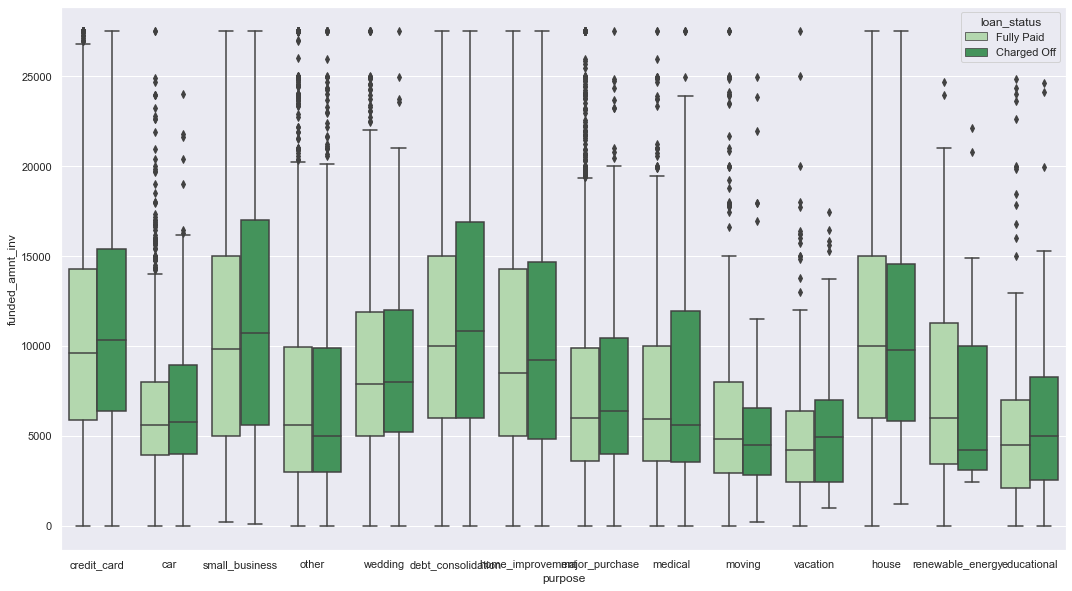

In [138]:
#plotting chart
plt.figure(figsize = (18,10))
sns.boxplot(data=loan_data_eda_winsorized, y="funded_amnt_inv", x='purpose', hue ='loan_status', palette="Greens")
plt.show()

<Figure size 1296x720 with 0 Axes>

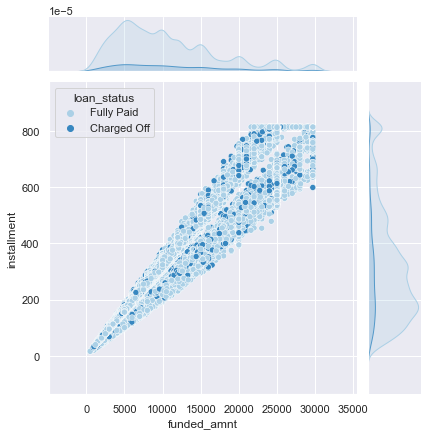

In [139]:
#plotting histogram for funded_amnt & installment with loan_status
plt.figure(figsize = (18,10))
sns.jointplot(data=loan_data_eda_winsorized, x="funded_amnt", y='installment', hue ='loan_status', palette="Blues")
plt.show()

<Figure size 1296x720 with 0 Axes>

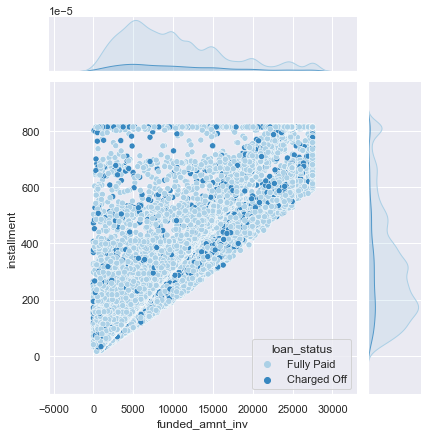

In [140]:
#plotting jointplot for funded_amnt_inv & installment with loan_status
plt.figure(figsize = (18,10))
sns.jointplot(data=loan_data_eda_winsorized, x="funded_amnt_inv", y='installment', hue ='loan_status', palette="Blues")
plt.show()